## Benchmark GPS, MTZ, Native TSP

In [1]:
#!pip3 install qubovert

In [2]:
import qubovert
import math
from neal import SimulatedAnnealingSampler
from dwave.system import DWaveSampler, EmbeddingComposite

import numpy as np
import matplotlib.pyplot as plt
from time import time

In [12]:
#%config InlineBackend.figure_format = 'svg' # Makes the images look nice
%config InlineBackend.figure_format = 'retina'
#%config InlineBackend.figure_format = 'pdf'

Seleccionamos el valor de $N$.

In [3]:
N = 6

Mostramos la localizacion de los nodos del problema que vamos a resolver

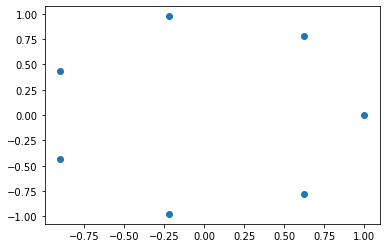

In [4]:
M=N+1
puntos = np.random.rand(M,2)
for i in range(M):
    ang = 2*i*np.pi/M
    puntos[i,0],puntos[i,1] = np.cos(ang),np.sin(ang)
#print(puntos)
plt.plot(puntos[:,0],puntos[:,1],'o')

def fnorm(v):  ## v must be a np.array
    return np.sqrt(np.sum(v**2))
dist = np.zeros((N+2,N+2))
for i in range(N):
    for j in range(i+1,N+1):
        aux  =  fnorm(puntos[i,:]-puntos[j,:])
        dist[i,j],dist[j,i] = aux,aux

for j in range(0,N+1):
    i = N+1
    aux  =  fnorm(puntos[0,:]-puntos[j,:])
    dist[i,j],dist[j,i] = aux,aux
#print(dist)


In [5]:
N

6

Transformamos las distancias en números enteros.

El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0]
6.180339887498948


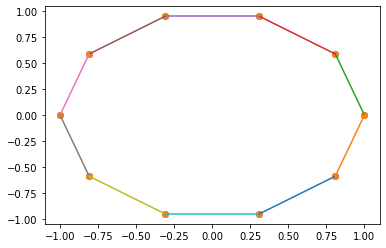

El tiempo tardado ha sido  0.174 segundos.


In [6]:
## Calculamos el mejor camino para vecinos cercanos

for N in range(2,10):
    M=N+1
    puntos = np.random.rand(M,2)
for i in range(M):
    ang = 2*i*np.pi/M
    puntos[i,0],puntos[i,1] = np.cos(ang),np.sin(ang)
#print(puntos)
plt.plot(puntos[:,0],puntos[:,1],'o')

def fnorm(v):  ## v must be a np.array
    return np.sqrt(np.sum(v**2))
dist = np.zeros((N+2,N+2))
for i in range(N):
    for j in range(i+1,N+1):
        aux  =  fnorm(puntos[i,:]-puntos[j,:])
        dist[i,j],dist[j,i] = aux,aux

for j in range(0,N+1):
    i = N+1
    aux  =  fnorm(puntos[0,:]-puntos[j,:])
    dist[i,j],dist[j,i] = aux,aux
#print(dist)


start_time = time()
lis_n = range(N+2)
dist_aux  = np.copy(dist)
for i in lis_n:
    dist_aux[i,i] = np.inf
dist_aux = np.copy(dist_aux[:-1,:-1])

i = 0
dist_vc = 0
ord_vc = [i]
for jj in range(N+1):
    dist_aux[jj,0] = np.inf
    
for cont in range(N):
    sig_dist = np.min(dist_aux[i,:])
    dist_vc += sig_dist
    sig = np.where(dist_aux[i,:] == sig_dist)[0][0]
    for jj in range(N+1):
        dist_aux[jj,sig] = np.inf
    i = sig
    ord_vc.append(i)

dist_vc += dist[ord_vc[-1],0]
ord_vc.append(0)
## print(dist_aux)

print("El orden por vecinos cercanos es ", ord_vc)
print(dist_vc)

## Pintamos el camino propuesto
plt.plot(puntos[:,0],puntos[:,1],'o')
for i in range(len(ord_vc)-1):
        plt.plot(puntos[(ord_vc[i],ord_vc[i+1]),0],puntos[(ord_vc[i],ord_vc[i+1]),1])
plt.show()
elapsed_time = np.round(time()-start_time,3)
print("El tiempo tardado ha sido ",elapsed_time,"segundos.")

## SIMULACIÓN


In [7]:
nsim = 1
SOLUCIONES = np.zeros((nsim,3))
#print(SOLUCIONES)
#np.savetxt('./Datos_Simulacion_1/Modelo_General.txt',SOLUCIONES)
#lectura = np.loadtxt('./Datos_Simulacion_1/Modelo_General.txt')


#### Simulacion Modelo General

El orden por vecinos cercanos es  [0, 1, 2, 0]
5.196152422706632


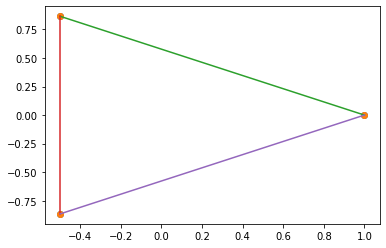

El tiempo tardado ha sido  0.149 segundos.

Estamos en la simulacion 0 de  1

The number of qubits is 48

Solution path drawing.


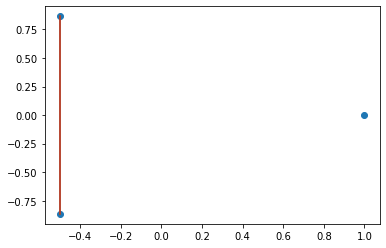


The length of the path is 3.4641016151377544

Running time has been 0.004 minutes.
El valor de la restriccion 1 es  -20.784609690826528 y deberia ser  -20.784609690826528
El valor de la restriccion 2 es  -20.784609690826528 y deberia ser  -20.784609690826528
El valor de la restriccion 3 es  -31.176914536239792 y deberia ser  -31.176914536239792
El valor de la restriccion 4-1 es 0.0
El valor de la restriccion 4-2 es 0.0
El valor de la funcion objetivo es  3.4641016151377544
El orden por vecinos cercanos es  [0, 1, 2, 3, 0]
5.65685424949238


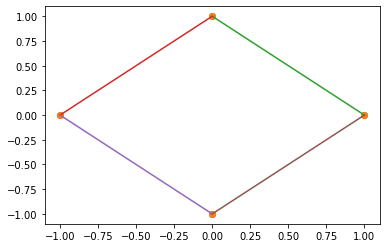

El tiempo tardado ha sido  0.178 segundos.

Estamos en la simulacion 0 de  1

The number of qubits is 100

Solution path drawing.


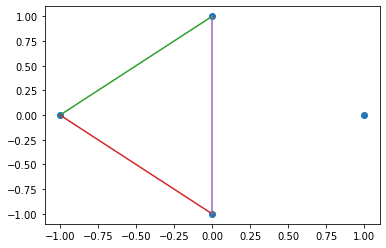


The length of the path is 4.82842712474619

Running time has been 0.006 minutes.
El valor de la restriccion 1 es  -32.0 y deberia ser  -32.0
El valor de la restriccion 2 es  -32.0 y deberia ser  -32.0
El valor de la restriccion 3 es  -45.25483399593904 y deberia ser  -45.25483399593904
El valor de la restriccion 4-1 es 0.0
El valor de la restriccion 4-2 es 0.0
El valor de la funcion objetivo es  4.82842712474619
El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 0]
5.877852522924732


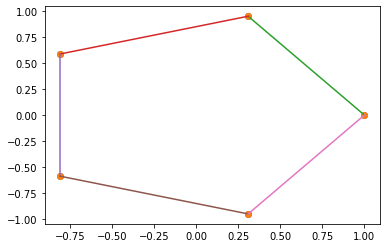

El tiempo tardado ha sido  0.175 segundos.

Estamos en la simulacion 0 de  1

The number of qubits is 180

Solution path drawing.


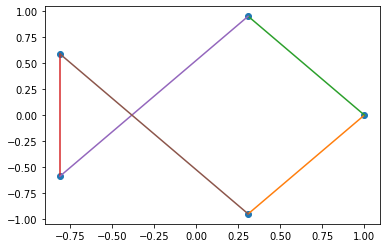


The length of the path is 7.330937578935453

Running time has been 0.011 minutes.
El valor de la restriccion 1 es  -38.042260651806146 y deberia ser  -38.042260651806146
El valor de la restriccion 2 es  -38.042260651806146 y deberia ser  -38.042260651806146
El valor de la restriccion 3 es  -58.778525229247315 y deberia ser  -58.77852522924732
El valor de la restriccion 4-1 es 0.0
El valor de la restriccion 4-2 es 0.0
El valor de la funcion objetivo es  7.330937578935453
El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 5, 0]
6.0


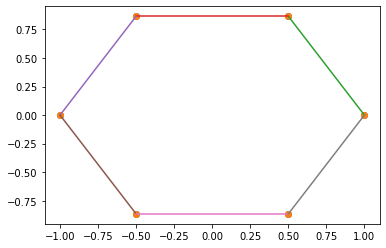

El tiempo tardado ha sido  0.166 segundos.

Estamos en la simulacion 0 de  1

The number of qubits is 294

Solution path drawing.


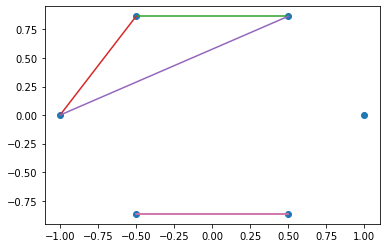


The length of the path is 5.7320508075688785

Running time has been 0.024 minutes.
El valor de la restriccion 1 es  -48.0 y deberia ser  -48.0
El valor de la restriccion 2 es  -48.0 y deberia ser  -48.0
El valor de la restriccion 3 es  -72.0 y deberia ser  -72.0
El valor de la restriccion 4-1 es 0.0
El valor de la restriccion 4-2 es 12.0
El valor de la funcion objetivo es  5.7320508075688785
El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 5, 6, 0]
6.074372347645813


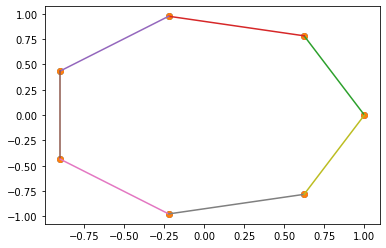

El tiempo tardado ha sido  0.179 segundos.

Estamos en la simulacion 0 de  1

The number of qubits is 448

Solution path drawing.


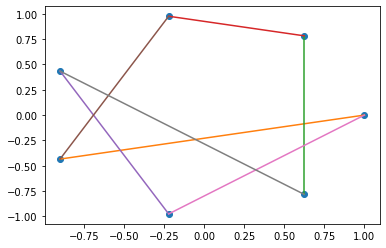


The length of the path is 11.02213098670665

Running time has been 0.055 minutes.
El valor de la restriccion 1 es  -54.595963082182124 y deberia ser  -54.595963082182124
El valor de la restriccion 2 es  -54.595963082182124 y deberia ser  -54.595963082182124
El valor de la restriccion 3 es  -85.04121286704138 y deberia ser  -85.04121286704138
El valor de la restriccion 4-1 es 0.0
El valor de la restriccion 4-2 es 0.0
El valor de la funcion objetivo es  11.02213098670665
El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 5, 6, 7, 0]
6.122934917841436


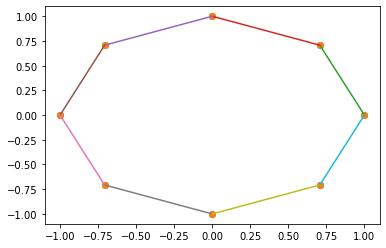

El tiempo tardado ha sido  0.176 segundos.

Estamos en la simulacion 0 de  1

The number of qubits is 648

Solution path drawing.


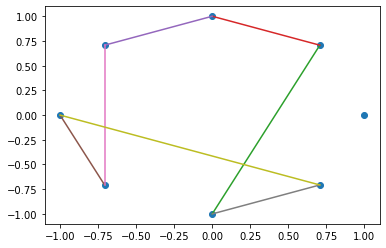


The length of the path is 8.93656601606914

Running time has been 0.113 minutes.
El valor de la restriccion 1 es  -64.0 y deberia ser  -64.0
El valor de la restriccion 2 es  -64.0 y deberia ser  -64.0
El valor de la restriccion 3 es  -85.7210888497801 y deberia ser  -97.96695868546297
El valor de la restriccion 4-1 es 0.0
El valor de la restriccion 4-2 es 0.0
El valor de la funcion objetivo es  8.93656601606914
El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 5, 6, 7, 8, 0]
6.156362579862038


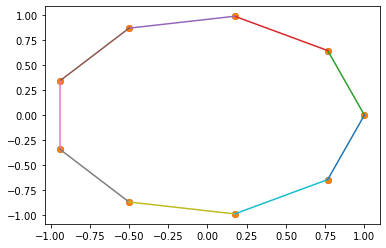

El tiempo tardado ha sido  0.17 segundos.

Estamos en la simulacion 0 de  1

The number of qubits is 900

Solution path drawing.


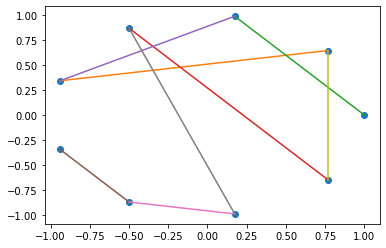


The length of the path is 12.865703557064037

Running time has been 0.24 minutes.
El valor de la restriccion 1 es  -63.02769619278132 y deberia ser  -70.90615821687899
El valor de la restriccion 2 es  -63.02769619278132 y deberia ser  -70.90615821687898
El valor de la restriccion 3 es  -110.81452643751669 y deberia ser  -110.81452643751669
El valor de la restriccion 4-1 es 0.0
El valor de la restriccion 4-2 es 0.0
El valor de la funcion objetivo es  12.865703557064037
El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0]
6.180339887498948


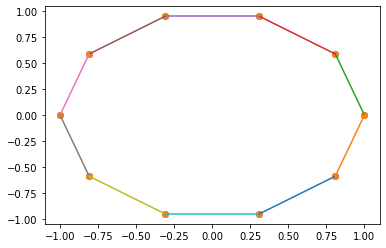

El tiempo tardado ha sido  0.173 segundos.

Estamos en la simulacion 0 de  1

The number of qubits is 1210

Solution path drawing.


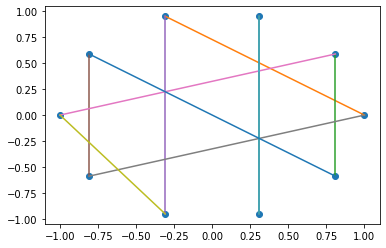


The length of the path is 16.65531066545627

Running time has been 0.472 minutes.
El valor de la restriccion 1 es  -80.0 y deberia ser  -80.0
El valor de la restriccion 2 es  -80.0 y deberia ser  -80.0
El valor de la restriccion 3 es  -123.60679774997897 y deberia ser  -123.60679774997897
El valor de la restriccion 4-1 es 0.0
El valor de la restriccion 4-2 es 12.360679774997896
El valor de la funcion objetivo es  16.65531066545627


In [8]:
## Simulacion Modelizacón general

for N in range(2,10):
    M=N+1
    puntos = np.random.rand(M,2)
    for i in range(M):
        ang = 2*i*np.pi/M
        puntos[i,0],puntos[i,1] = np.cos(ang),np.sin(ang)
    #print(puntos)
    plt.plot(puntos[:,0],puntos[:,1],'o')

    def fnorm(v):  ## v must be a np.array
        return np.sqrt(np.sum(v**2))
    dist = np.zeros((N+2,N+2))
    for i in range(N):
        for j in range(i+1,N+1):
            aux  =  fnorm(puntos[i,:]-puntos[j,:])
            dist[i,j],dist[j,i] = aux,aux

    for j in range(0,N+1):
        i = N+1
        aux  =  fnorm(puntos[0,:]-puntos[j,:])
        dist[i,j],dist[j,i] = aux,aux
    #print(dist)


    start_time = time()
    lis_n = range(N+2)
    dist_aux  = np.copy(dist)
    for i in lis_n:
        dist_aux[i,i] = np.inf
    dist_aux = np.copy(dist_aux[:-1,:-1])

    i = 0
    dist_vc = 0
    ord_vc = [i]
    for jj in range(N+1):
        dist_aux[jj,0] = np.inf

    for cont in range(N):
        sig_dist = np.min(dist_aux[i,:])
        dist_vc += sig_dist
        sig = np.where(dist_aux[i,:] == sig_dist)[0][0]
        for jj in range(N+1):
            dist_aux[jj,sig] = np.inf
        i = sig
        ord_vc.append(i)

    dist_vc += dist[ord_vc[-1],0]
    ord_vc.append(0)
    ## print(dist_aux)

    print("El orden por vecinos cercanos es ", ord_vc)
    print(dist_vc)

    ## Pintamos el camino propuesto
    plt.plot(puntos[:,0],puntos[:,1],'o')
    for i in range(len(ord_vc)-1):
            plt.plot(puntos[(ord_vc[i],ord_vc[i+1]),0],puntos[(ord_vc[i],ord_vc[i+1]),1])
    plt.show()
    elapsed_time = np.round(time()-start_time,3)
    print("El tiempo tardado ha sido ",elapsed_time,"segundos.")
    ######
    from neal import SimulatedAnnealingSampler
    modelo = 0 ## Poner 0 para SA, 1 para simulated QA, 2 para real QA
    n_samples = 2

    stm1 = time() ## start time model 1
    pen = 2
    pen1 = 4

    Q = qubovert.QUBO()
    for u in range(N+2):
        for v in range(N+2):
            if u !=v:
                for t in range(N+1):
                    Q.create_var(f"x_{u}_{v}_{t}")

    for v in range(N+2):
        for t in range(N):
            Q.create_var(f"a_{v}_{t}")


    nqm1 = (N+2)*(N+2)*(N+1) ## Nnumber of qubits model 1

    ## Restriccion 1: Salimos una vez de cada ciudad
    for u in range(N+1):
        lambda_1 = pen1*np.max(dist[u,])
        for v1 in range(1,N+2):
            if u!=v1:
                for t1 in range(N+1):
                    for v2 in range(1,N+2):
                        if u!=v2:
                            for t2 in range(N+1):
                                Q[(f"x_{u}_{v1}_{t1}",f"x_{u}_{v2}_{t2}")] += lambda_1
                    Q[(f"x_{u}_{v1}_{t1}",)] += -2*lambda_1
    ## Minimo $-lambda_1*(N+1)$

    ## Restriccion 2: LLegamos una  vez a cada ciudad
    for v in range(1,N+2):
        lambda_2 = np.max(dist[:,v])*pen1
        for u1 in range(N+1):
            if v!=u1:
                for t1 in range(N+1):
                    for u2 in range(N+1):
                        if v!=u2:
                            for t2 in range(N+1):
                                Q[(f"x_{u1}_{v}_{t1}",f"x_{u2}_{v}_{t2}")] += lambda_2
                    Q[(f"x_{u1}_{v}_{t1}",)] += -2*lambda_2
    ## Minimo -lambda_2*(N+1)

    ## Restriccion 3: En cada instante solo podemos estar en un arista
    lambda_3 = dist_vc*pen
    for t in range(N+1):
        for u1 in range(N+2):
            for v1 in range(N+2):
                if u1 !=v1:
                    for u2 in range(N+2):
                        for v2 in range(N+2):
                            if u2!=v2:
                                Q[(f"x_{u1}_{v1}_{t}",f"x_{u2}_{v2}_{t}")] += lambda_3
                    Q[(f"x_{u1}_{v1}_{t}",)] += -2*lambda_3
    ## Minimo -lambda_3*(N+1)

    ## Restriccion 4: Evitamos que haya ciclos
    lambda_4 = dist_vc*pen

    ## variables a_{v,t} = \sum x_{v,w,t+1}
    for v in range(N+2):
        for t in range(N):
            Q[(f"a_{v}_{t}",)] += lambda_4
            for w in range(1,N+2):
                if v!=w:
                    Q[(f"a_{v}_{t}",f"x_{v}_{w}_{t+1}")] += -2*lambda_4
            for w1 in range(1,N+2):
                if w1 !=v:
                    for w2 in range(1,N+2):
                        if v != w2:
                            Q[(f"x_{v}_{w1}_{t+1}",f"x_{v}_{w2}_{t+1}")] += lambda_4

    for t in range(N):
        for u in range(N+2):
            for v in range(N+2):
                if u!=v:
                    Q[(f"x_{u}_{v}_{t}",f"a_{v}_{t}")] += -lambda_4
                    Q[(f"x_{u}_{v}_{t}",)] += +lambda_4



    # función objetivo
    lambda_obj = 1
    for u in range(N+2):
        for v in range(N+2):
            if u != v:
                for t in range(N+1):
                    Q[(f"x_{u}_{v}_{t}",)] += lambda_obj*dist[u,v]


    dwave_dic = {}
    for i in Q:
        if len(i) == 1:
            dwave_dic[(i[0],i[0])] = Q[i]
        else:
            dwave_dic[i] = Q[i]



    ### Realizamos la simulacion
    from neal import SimulatedAnnealingSampler
    #from dwave.system import DWaveSampler, EmbeddingComposite

    for jjj in range(nsim):
        if modelo == 0:
            sampleset = qubovert.sim.anneal_qubo(dwave_dic, num_anneals=n_samples)
            solution = sampleset.best.state

        if modelo == 1:
            sampler = SimulatedAnnealingSampler()
            #sampler = EmbeddingComposite(DWaveSampler())
            sampleset = sampler.sample_qubo(dwave_dic, num_reads = n_samples)
            solution = sampleset.first.sample

        if modelo == 2:
            sampler = EmbeddingComposite(DWaveSampler())
            sampleset = sampler.sample_qubo(dwave_dic,num_reads = n_samples)
            solution = sampleset.first.sample

        ## Comprobamos los resultados
        print()
        print("Estamos en la simulacion",jjj, "de ",nsim)
        print()
        print("The number of qubits is",nqm1)
        mat_sol = np.zeros((N+2,N+2))
        for u in range(N+2):
            for v in range(N+2):
                if u!=v:
                    for t in range(N+1):
                        if solution[f"x_{u}_{v}_{t}"] == 1:
                            mat_sol[u,v] = 1
        #print(mat_sol)
        print()

        ## Pintamos el camino propuesto
        print("Solution path drawing.")
        plt.plot(puntos[:,0],puntos[:,1],'o')
        vaux = np.array(list(range(N+2)))
        suma_ruta = 0
        for i in range(N+1):
            sig_aux = mat_sol[i,:]==1
            if np.sum(sig_aux) > 0:
                sig = (int(vaux[sig_aux][0]))%(N+1)
                plt.plot(puntos[(i,sig),0],puntos[(i,sig),1])
                suma_ruta += np.floor(1000*fnorm(puntos[i,:]-puntos[sig,:]))
        plt.show()



        # función objetivo
        val_obj = 0
        for u in range(N+2):
            for v in range(N+2):
                if u != v:
                    for t in range(N+1):
                        val_obj += solution[f"x_{u}_{v}_{t}"]*dist[u,v] * lambda_obj

        print()
        print("The length of the path is",val_obj)
        lpm1 = val_obj

        etm1 = np.round((time()-stm1)/60,3) ## Elapsed time model 1
        print()
        print("Running time has been",etm1,"minutes.")


        ## Comprobamos que se verifican las restricciones
        ## Restriccion 1: Salimos una vez de cada ciudad
        val_res1 = 0
        val1_tot = 0
        for u in range(N+1):
            lambda_1 = pen1*np.max(dist[u,])
            val1_tot += lambda_1
            for v1 in range(1,N+2):
                if u!=v1:
                    for t1 in range(N+1):
                        for v2 in range(1,N+2):
                            if u!=v2:
                                for t2 in range(N+1):
                                    val_res1 += solution[f"x_{u}_{v1}_{t1}"]*solution[f"x_{u}_{v2}_{t2}"] * lambda_1
                        val_res1 += solution[f"x_{u}_{v1}_{t1}"] * (-2*lambda_1)
        print("El valor de la restriccion 1 es ",val_res1,"y deberia ser ",-val1_tot)
        ## Minimo $-lambda_1*(N+1)$

        ## Restriccion 2: LLegamos una  vez a cada ciudad
        val_res2 = 0
        val2_tot = 0
        for v in range(1,N+2):
            lambda_2 = pen1*np.max(dist[:,v])
            val2_tot += lambda_2
            for u1 in range(N+1):
                if v!=u1:
                    for t1 in range(N+1):
                        for u2 in range(N+1):
                            if v!=u2:
                                for t2 in range(N+1):
                                    val_res2 += solution[f"x_{u1}_{v}_{t1}"]*solution[f"x_{u2}_{v}_{t2}"] * lambda_2
                        val_res2 += solution[f"x_{u1}_{v}_{t1}"] * (-2*lambda_2)
        print("El valor de la restriccion 2 es ",val_res2,"y deberia ser ",-val2_tot)
        ## Minimo -lambda_2*(N+1)

        ## Restriccion 3: En cada instante solo podemos estar en un arista
        val_res3 = 0
        for t in range(N+1):
            for u1 in range(N+2):
                for v1 in range(N+2):
                    if u1 !=v1:
                        for u2 in range(N+2):
                            for v2 in range(N+2):
                                if u2!=v2:
                                    val_res3 += solution[f"x_{u1}_{v1}_{t}"]*solution[f"x_{u2}_{v2}_{t}"] * lambda_3
                        val_res3 += solution[f"x_{u1}_{v1}_{t}"] * (-2*lambda_3)
        print("El valor de la restriccion 3 es ",val_res3,"y deberia ser ",-lambda_3*(N+1))
        ## Minimo -lambda_3*(N+1)

        ## Restriccion 4: Evitamos que haya ciclos
        val_res41 = 0
        val_res42 = 0
        ## variables a_{v,t} = \sum x_{v,w,t+1}
        for v in range(N+2):
            for t in range(N):
                Q[(f"a_{v}_{t}",)] += lambda_4
                for w in range(1,N+2):
                    if v!=w:
                        val_res41 = solution[f"a_{v}_{t}"]*solution[f"x_{v}_{w}_{t+1}"] * (-2*lambda_4)
                for w1 in range(1,N+2):
                    if w1 != v:
                        for w2 in range(1,N+2):
                            if v != w2:
                                val_res41 += solution[f"x_{v}_{w1}_{t+1}"]*solution[f"x_{v}_{w2}_{t+1}"] * lambda_4
        print("El valor de la restriccion 4-1 es",val_res41)


        for t in range(N):
            for u in range(N+2):
                for v in range(N+2):
                    if u!=v:
                        val_res42 += solution[f"x_{u}_{v}_{t}"]*solution[f"a_{v}_{t}"] * (-lambda_4)
                        val_res42 += solution[f"x_{u}_{v}_{t}"] * (lambda_4)
        print("El valor de la restriccion 4-2 es",val_res42)


        # función objetivo
        val_obj = 0
        for u in range(N+2):
            for v in range(N+2):
                if u != v:
                    for t in range(N+1):
                        val_obj += solution[f"x_{u}_{v}_{t}"]*dist[u,v] * lambda_obj
        print("El valor de la funcion objetivo es ",val_obj)

        val_res_suma = val_res1+val_res2+val_res3
        val_res_cor = -val1_tot-val2_tot-lambda_3*(N+1)
        if np.round(val_res_suma,3) == np.round(val_res_cor,3):
            SOLUCIONES[jjj,0] = 0
            SOLUCIONES[jjj,1] = etm1
            SOLUCIONES[jjj,2] = lpm1
        else:
            SOLUCIONES[jjj,0] = 1
            SOLUCIONES[jjj,1] = etm1
            SOLUCIONES[jjj,2] = 0

        #np.savetxt('./Datos_Simulacion_1/Modelo_General.txt',SOLUCIONES)


In [9]:
SOLUCIONES

array([[ 0.        ,  0.472     , 16.65531067]])

In [10]:
len(dwave_dic)

133545

### MODELO GPS



The number of qubits is 363

Solution path drawing.


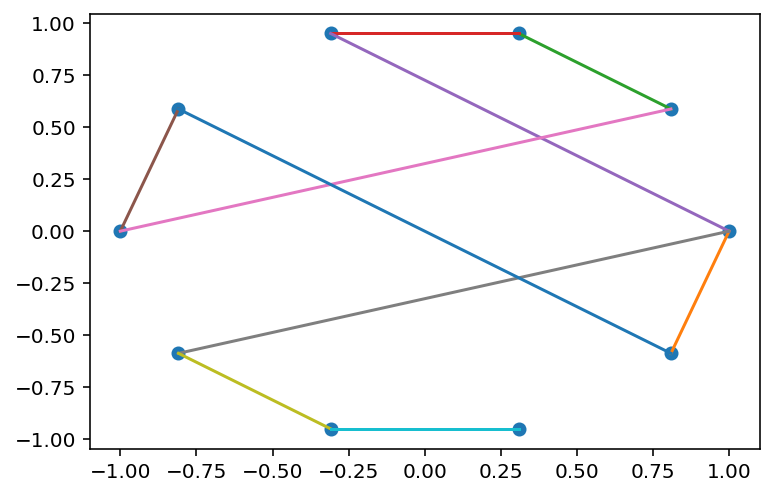


The length of the solution path is 11.748497975179774

Running time has been 0.03 minutes.
La restriccion 1 esta aportando  -1359.6747752497704  y deberia aportar  -1359.6747752497686
La restriccion 2 esta aportando  -72.0  y deberia aportar  -80.0
La restriccion 3 esta aportando  -80.0  y deberia aportar  -80.0
La restriccion 7 esta aportando  -1359.6747752497688  y deberia aportar  -1359.6747752497686
La restriccion 8 esta aportando  0.0  y deberia aportar  0
La funcion objetivo esta aportando  11.748497975179774


In [13]:
modelo = 0 ## Poner 0 para SA, 1 para simulated QA, 2 para real QA
n_samples = 300 # número de veces que ejecutamos el sistema

stm2 = time()

R=3
lis_r = range(R)
lis_n = range(0,N+2)

pen = 2
pen1 = 4

# Creamos las variables de nuestro modelo
coef = qubovert.QUBO()

## Variables x_{i,j,r,q}
for i in lis_n:
    for j in lis_n:
        if not i==j:
            for r in lis_r:
                coef.create_var(f"x_{i}_{j}_{r}")
nqm2 = len(lis_n)*len(lis_n)*len(lis_r)
nqm2 = (N+2)*(N+2)*3

## Restricción 1
## Un solo caso para cada r
lambda_1 = dist_vc*pen
for i in lis_n:
    for j in lis_n:
        if not i==j:
            for r1 in lis_r:
                for r2 in lis_r:
                    coef[(f"x_{i}_{j}_{r1}",f"x_{i}_{j}_{r2}")] += (lambda_1)
            for r in lis_r:     
                    coef[(f"x_{i}_{j}_{r}",)] += -2*(lambda_1)



## Restriccion 2
## Se debe salir una vez de cada nodo
for i in range(N+1):
    lambda_2 = pen1*np.max(dist[i,])
    for j in lis_n:
        if not i == j:
            coef[(f"x_{i}_{j}_{1}",)] += -2*lambda_2 
    for j1 in  lis_n:
        if j1 != i:
            for j2 in lis_n:
                if j2!=i:
                    coef[(f"x_{i}_{j1}_{1}",f"x_{i}_{j2}_{1}")]+= lambda_2 



## Restriccion 3
## Se debe llegar una vez a cada nodo
for j in range(1,N+2):
    lambda_3 = np.max(dist[:,j])*pen1
    for i in range(N+1):
        if i!=j:
            coef[(f"x_{i}_{j}_{1}",)] += -2*lambda_3
    for i1 in  lis_n:
        if i1!=j:
            for i2 in lis_n:
                if i2!=j:
                    coef[(f"x_{i1}_{j}_{1}",f"x_{i2}_{j}_{1}")]+= lambda_3 


## Restriccion 7
## Correcto orden de los nodos i,j
lambda_7 = dist_vc*pen
for i in lis_n:
    for j in lis_n:
        if i!=j:
            coef[(f"x_{i}_{j}_{2}",f"x_{j}_{i}_{2}")] += lambda_7 
            coef[(f"x_{i}_{j}_{2}",)] += -lambda_7 
            coef[(f"x_{j}_{i}_{2}",)] += -lambda_7 





## Restriccion 8
## Relacion de orden entre los nodos i,j,k
lambda_8 = dist_vc*pen
for i in range(1,N+1):
    for j in range(1,N+1):
        for k in range(1,N+1):
            if i!=j and j!=k and i!=k:
                        coef[(f"x_{j}_{i}_{2}",f"x_{k}_{j}_{2}")] += lambda_8
                        coef[(f"x_{j}_{i}_{2}",f"x_{k}_{i}_{2}")] -= lambda_8
                        coef[(f"x_{k}_{j}_{2}",f"x_{k}_{i}_{2}")] -= lambda_8
                        coef[(f"x_{k}_{i}_{2}",)] +=  lambda_8


## Funcion objetivo
lambda_obj = 1
for i in lis_n:
    for j in lis_n:
        if i!=j:
            coef[(f"x_{i}_{j}_{1}",)] += lambda_obj*dist[i,j]



dwave_dic = {}
for i in coef:
    if len(i) == 1:
        dwave_dic[(i[0],i[0])] = coef[i]
    else:
        dwave_dic[i] = coef[i]

for jjj in range(nsim):

    if modelo == 0:
        sampleset = qubovert.sim.anneal_qubo(dwave_dic, num_anneals=n_samples)
        solution = sampleset.best.state
        
    if modelo == 1:
        sampler = SimulatedAnnealingSampler()
        #sampler = EmbeddingComposite(DWaveSampler())
        sampleset = sampler.sample_qubo(dwave_dic, num_reads = n_samples)
        solution = sampleset.first.sample
    
    if modelo == 2:
        sampler = EmbeddingComposite(DWaveSampler())
        sampleset = sampler.sample_qubo(dwave_dic,num_reads = n_samples)
        solution = sampleset.first.sample

    print()
    print("The number of qubits is",nqm2)

    ## Mejor energia
    #print(sampleset.first.energy)
    ## Matriz solucion
    mat_sol = np.zeros((N+2,N+2))
    for i in  range(N+2):
        for j in range(N+2):
            if i!=j:
                if solution[f"x_{i}_{j}_{1}"] == 1:
                    mat_sol[i,j] = 1
    #print(mat_sol)

    ## Pintamos el camino propuesto
    print()
    print("Solution path drawing.")
    plt.plot(puntos[:,0],puntos[:,1],'o')
    vaux = np.array(list(range(N+2)))
    suma_ruta = 0
    for i in range(N+1):
        sig_aux = mat_sol[i,:]==1
        if np.sum(sig_aux) > 0:
            sig = (int(vaux[sig_aux][0]))%(N+1)
            plt.plot(puntos[(i,sig),0],puntos[(i,sig),1])
            suma_ruta += np.floor(1000*fnorm(puntos[i,:]-puntos[sig,:]))
    plt.show()


    ## Calculamos la distancia que se recorre
    val_resobj = 0
    for i in lis_n:
        for j in lis_n:
            if i!=j:
                val_resobj += solution[f"x_{i}_{j}_{1}"]*lambda_obj*dist[i,j]
    print()
    print("The length of the solution path is",val_resobj)
    lpm2 = val_resobj

    etm2 = np.round((time()-stm2)/60,3) ## Elapsed time model 1
    print()
    print("Running time has been",etm2,"minutes.")
    
    
    
    
    best_energy = 0
    ## Restricción 1
    val_res1 = 0
    for i in lis_n:
        for j in lis_n:
            if i != j:
                for r1 in lis_r:
                    for r2 in lis_r:
                        val_res1 += lambda_1*solution[f"x_{i}_{j}_{r1}"]*solution[f"x_{i}_{j}_{r2}"]  
                for r in lis_r:     
                        val_res1 += -2*lambda_1*solution[f"x_{i}_{j}_{r}"] 

    print("La restriccion 1 esta aportando ",val_res1, " y deberia aportar ",-((N+2)**2-(N+2))*lambda_1)                  
    best_energy += val_res1
    val_cor1 = -((N+2)**2-(N+2))*lambda_1



    ## Restriccion 2
    val_res2 = 0
    val2_tot = 0
    for i in range(N+1):
        lambda_2 = pen1*np.max(dist[i,])
        val2_tot += lambda_2
        for j in lis_n:
            if i != j:
                val_res2 += -2*lambda_2 *solution[f"x_{i}_{j}_{1}"] 
        for j1 in  lis_n:
            if i!=j1:
                for j2 in lis_n:
                    if i!=j2:
                        val_res2 += solution[f"x_{i}_{j1}_{1}"]*solution[f"x_{i}_{j2}_{1}"]*lambda_2 

    print("La restriccion 2 esta aportando ",val_res2, " y deberia aportar ",-val2_tot)                
    best_energy += val_res2                
    val_cor2 = -val2_tot

    ## Restriccion 3
    val_res3 = 0
    val3_tot = 0
    for j in range(1,N+2):
        lambda_3 = pen1*np.max(dist[:,j])
        val3_tot += lambda_3
        for i in range(N+1):
            if i!=j:
                val_res3 += -2*lambda_3*solution[f"x_{i}_{j}_{1}"] 
        for i1 in  lis_n:
            if i1 !=j:
                for i2 in lis_n:
                    if i2 !=j:
                        val_res3 += solution[f"x_{i1}_{j}_{1}"]*solution[f"x_{i2}_{j}_{1}"]*lambda_3 

    print("La restriccion 3 esta aportando ",val_res3, " y deberia aportar ",-val3_tot) 
    val_cor3 = -val3_tot
    best_energy += val_res3              





    ## Restriccion 7
    val_res7 = 0
    for i in lis_n:
        for j in lis_n:
            if i!=j:
                val_res7 += solution[f"x_{i}_{j}_{2}"]*solution[f"x_{j}_{i}_{2}"] * lambda_7 
                val_res7 += solution[f"x_{i}_{j}_{2}"] * (-lambda_7) 
                val_res7 += solution[f"x_{j}_{i}_{2}"] * (-lambda_7) 
    print("La restriccion 7 esta aportando ",val_res7, " y deberia aportar ",(-(N+2)**2+N+2)*lambda_7)      
    val_cor7 = (-(N+2)**2+N+2)*lambda_7
    best_energy += val_res7              





    ## Restriccion 8
    val_res8 = 0
    for i in range(1,N+1):
        for j in range(1,N+1):
            for k in range(1,N+1):
                if i!=j and j!=k and i!=k:
                            val_res8 += solution[f"x_{j}_{i}_{2}"]*solution[f"x_{k}_{j}_{2}"] * lambda_8
                            val_res8 += -solution[f"x_{j}_{i}_{2}"]*solution[f"x_{k}_{i}_{2}"] * lambda_8
                            val_res8 += -solution[f"x_{k}_{j}_{2}"]*solution[f"x_{k}_{i}_{2}"] * lambda_8
                            val_res8 += solution[f"x_{k}_{i}_{2}"]*solution[f"x_{k}_{i}_{2}"] * lambda_8
    print("La restriccion 8 esta aportando ",val_res8, " y deberia aportar ",0)      
    val_cor8  = 0
    best_energy += val_res8              



    ## Funcion objetivo
    val_resobj = 0
    for i in lis_n:
        for j in lis_n:
            if i != j:
                val_resobj += solution[f"x_{i}_{j}_{1}"]*lambda_obj*dist[i,j]
    print("La funcion objetivo esta aportando ",val_resobj )                  
    best_energy += val_resobj              

    #print("Nuestra energia es ",best_energy)
    #print("La energia de sampleset es ",sampleset.first.energy) 
    
    
    val_res_suma = val_res1+val_res2+val_res3+val_res7+val_res8
    val_res_cor = val_cor1+val_cor2+val_cor3+val_cor7+val_cor8
    if np.round(val_res_suma,3) == np.round(val_res_cor,3):
        SOLUCIONES[jjj,0] = 0
        SOLUCIONES[jjj,1] = etm2
        SOLUCIONES[jjj,2] = lpm2
    else:
        SOLUCIONES[jjj,0] = 1
        SOLUCIONES[jjj,1] = etm2
        SOLUCIONES[jjj,2] = 0
        
    np.savetxt('./Datos_Simulacion_1/Modelo_GPS.txt',SOLUCIONES)

    

In [14]:
lectura = np.loadtxt('./Datos_Simulacion_1/Modelo_GPS.txt')
print(lectura)

[1.   0.03 0.  ]


In [15]:
len(dwave_dic)

2623

In [16]:
nqm2

363

## MODELO MTZ

The number of qubits is 770

Solution path drawing.


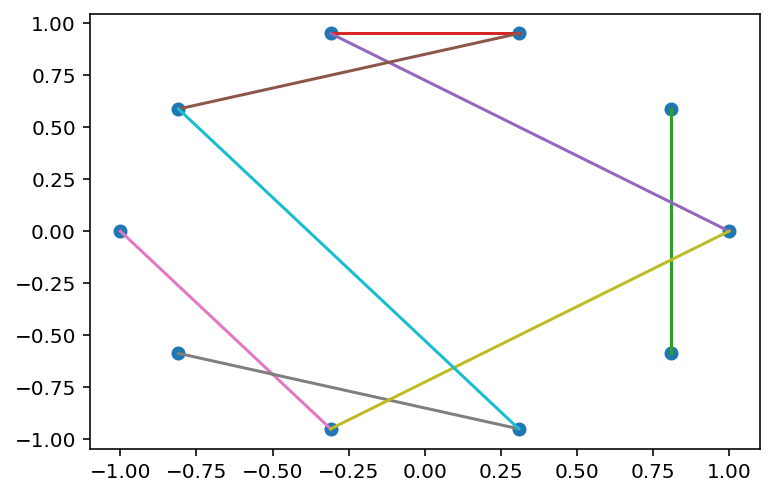


The length of the solution path is 15.427672015099565

Running time has been 0.152 minutes.


In [17]:
modelo = 0


stm3 = time()

lis_n = range(0,N+2)
lis_h = range(int(np.log2(N+1))+1)
lis_p = range(int(np.log2(2*(N+1)))+1)



lag_gen = 100
lambda_1 = lag_gen
lambda_2 = lag_gen
lambda_3 = 14
lambda_obj = 1



# Creamos las variables de nuestro modelo

## Variables x_{i,j}
coef = qubovert.QUBO()
for i in lis_n:
    for j in lis_n:
        if i!=j:
            coef.create_var(f"x_{i}_{j}")

## Variables u_{i,h}               
for i in lis_n:
    for h in lis_h:
        coef.create_var(f"u_{i}_{h}")
    
## Variables auxiliares 
for i in lis_n:
    for j in lis_n:
        if i!=j:
            for p in lis_p:
                coef.create_var(f"aux_{i}_{j}_{p}")

nqm3 = len(lis_n)**2 + len(lis_n)*len(lis_h) + len(lis_n)*len(lis_n)*len(lis_p)
nqm3 = (N+2)*(N+2)+(N+2)*(int(np.log2(N+1))+1)+(N+2)*(N+2)*(int(np.log2(2*(N+1)))+1)
                
## Restricción 1
for i in range(N+1):
    for j1 in range(1,N+2):
        if i!=j1:
            for j2 in range(1,N+2):
                if i != j2:
                    coef[(f"x_{i}_{j1}",f"x_{i}_{j2}")] += lambda_1
            coef[(f"x_{i}_{j1}",)] += -2*lambda_1

        
## Restriccion 2
for j in range(1,N+2):
    for i1 in range(0,N+1):
        if i1!=j:
            for i2 in range(0,N+1):
                if i2!=j:
                    coef[(f"x_{i1}_{j}",f"x_{i2}_{j}")] += lambda_2
            coef[(f"x_{i1}_{j}",)] += -2*lambda_2


## Restriccion 3
## ui - uj + (N+2)xij + \sum aux - (N+1) = 0 
for i in lis_n:
    for j in lis_n:
        if i!=j:
            ## a^2 
            for h1 in lis_h:
                for h2 in lis_h:
                    coef[(f"u_{i}_{h1}",f"u_{i}_{h2}")] += lambda_3*2**(h1+h2)
            ## 2ab
            for h1 in lis_h:
                for h2 in lis_h:
                    coef[(f"u_{i}_{h1}",f"u_{j}_{h2}")] += -2*lambda_3*2**(h1+h2)
            ## 2ac
            for h1 in lis_h:
                coef[(f"u_{i}_{h1}",f"x_{i}_{j}")] += 2*lambda_3*(N+2)*2**(h1)

            ## 2ad
            for h1 in lis_h:
                for h2 in lis_p:
                    coef[(f"u_{i}_{h1}",f"aux_{i}_{j}_{h2}")] += 2*lambda_3*2**(h1+h2)

            ## 2ae
            for h in lis_h:
                coef[(f"u_{i}_{h}",)] += -2*lambda_3*2**(h)*(N+1)

            ## b^2
            for h1 in lis_h:
                for h2 in lis_h:
                    coef[(f"u_{j}_{h1}",f"u_{j}_{h2}")] += lambda_3*2**(h1+h2)
            ## 2bc
            for h1 in lis_h:
                coef[(f"u_{j}_{h1}",f"x_{i}_{j}")] += -2*lambda_3*(N+2)*2**(h1)

            ## 2bd
            for h1 in lis_h:
                for h2 in lis_p:
                    coef[(f"u_{j}_{h1}",f"aux_{i}_{j}_{h2}")] += -2*lambda_3*2**(h1+h2)

            ## 2be
            for h in lis_h:
                coef[(f"u_{j}_{h}",)] += 2*lambda_3*2**(h)*(N+1)

            ## c^2
            coef[(f"x_{i}_{j}",)] += lambda_3*(N+2)**(2)

            ## 2cd
            for h1 in lis_p:
                coef[(f"x_{i}_{j}",f"aux_{i}_{j}_{h1}")] += 2*lambda_3*2**(h1)*(N+2)

            ## 2ce
            coef[(f"x_{i}_{j}",)] += -2*lambda_3*(N+1)*(N+2)

            ## d^2
            for h1 in lis_p:
                for h2 in lis_p:
                    coef[(f"aux_{i}_{j}_{h1}",f"aux_{i}_{j}_{h2}")] += lambda_3*2**(h1+h2)
            ## 2de
            for h1 in lis_p:
                coef[(f"aux_{i}_{j}_{h1}",)] += -2*lambda_3*2**(h1)*(N+1)
 
    
## Funcion objetivo
for i in lis_n:
    for j in lis_n:
        if i!=j:
            coef[(f"x_{i}_{j}",)] += lambda_obj * dist[i,j]

            
            
dwave_dic = {}
for i in coef:
    if len(i) == 1:
        dwave_dic[(i[0],i[0])] = coef[i]
    else:
        dwave_dic[i] = coef[i]
        
#dwave_dic
           
if modelo == 0:
        sampleset = qubovert.sim.anneal_qubo(dwave_dic, num_anneals=n_samples)
        solution = sampleset.best.state
        
if modelo == 1:
        sampler = SimulatedAnnealingSampler()
        #sampler = EmbeddingComposite(DWaveSampler())
        sampleset = sampler.sample_qubo(dwave_dic, num_reads = n_samples)
        solution = sampleset.first.sample
    
if modelo == 2:
        sampler = EmbeddingComposite(DWaveSampler())
        sampleset = sampler.sample_qubo(QUBO_def,num_reads = n_samples)
        solution = sampleset.first.sample
 


print("The number of qubits is",nqm3)

## Mejor energia
#print(sampleset.first.energy)
## Matriz solucion

mat_sol = np.zeros((N+2,N+2))
for i in  range(N+2):
    for j in range(N+2):
        if i!=j:
            if solution[f"x_{i}_{j}"] == 1:
                mat_sol[i,j] = 1
#print(mat_sol)

print()
print("Solution path drawing.")
    
## Pintamos el camino propuesto
plt.plot(puntos[:,0],puntos[:,1],'o')
vaux = np.array(list(range(N+2)))
suma_ruta = 0
for i in range(N+1):
    sig_aux = mat_sol[i,:]==1
    if np.sum(sig_aux) > 0:
        sig = (int(vaux[sig_aux][0]))%(N+1)
        plt.plot(puntos[(i,sig),0],puntos[(i,sig),1])
        suma_ruta += np.floor(1000*fnorm(puntos[i,:]-puntos[sig,:]))
plt.show()

val_obj = 0
for i in lis_n:
    for j in lis_n:
        if i!=j:
            val_obj += solution[f"x_{i}_{j}"] * lambda_obj * dist[i,j]
print()
print("The length of the solution path is",val_obj)
lpm3 = val_obj

etm3 = np.round((time() - stm3)/60,3)
print()
print("Running time has been",etm3,"minutes.")





In [18]:

## Restricción 1
val_res1 = 0
for i in range(N+1):
    for j1 in range(1,N+2):
        if i!=j1:
            for j2 in range(1,N+2):
                if i != j2:
                    val_res1 += solution[f"x_{i}_{j1}"]*solution[f"x_{i}_{j2}"]*lambda_1
            val_res1 += solution[f"x_{i}_{j1}"] * (-2*lambda_1)
print("El valor de la primera restriccion es ",val_res1, "y deberia ser",-(N+1)*lambda_1)
        
## Restriccion 2
val_res2 = 0
for j in range(1,N+2):
    for i1 in range(0,N+1):
        if i1!=j:
            for i2 in range(0,N+1):
                if i2!=j:
                    val_res2 += solution[f"x_{i1}_{j}"]*solution[f"x_{i2}_{j}"] * lambda_2
            val_res2 += solution[f"x_{i1}_{j}"] * (-2*lambda_2)
print("El valor de la restriccion 2 es ",val_res2, "y deberia ser",-(N+1)*lambda_2)

## Restriccion 3
## ui - uj + (n+1)xij + \sum aux - (N) = 0 
val_res3 = 0
cont = 0
for i in lis_n:
    for j in lis_n:
        if i!=j:
            cont = cont+1
            ## a^2 
            for h1 in lis_h:
                for h2 in lis_h:
                    val_res3 += solution[f"u_{i}_{h1}"]*solution[f"u_{i}_{h2}"] * lambda_3*2**(h1+h2)
            ## 2ab
            for h1 in lis_h:
                for h2 in lis_h:
                    val_res3 += solution[f"u_{i}_{h1}"]*solution[f"u_{j}_{h2}"] * (-2*lambda_3*2**(h1+h2))
            ## 2ac
            for h1 in lis_h:
                val_res3 += solution[f"u_{i}_{h1}"]*solution[f"x_{i}_{j}"] * 2*lambda_3*(N+2)*2**(h1)

            ## 2ad
            for h1 in lis_h:
                for h2 in lis_p:
                    val_res3 += solution[f"u_{i}_{h1}"]*solution[f"aux_{i}_{j}_{h2}"] * 2*lambda_3*2**(h1+h2)

            ## 2ae
            for h in lis_h:
                val_res3 += solution[f"u_{i}_{h}"] * (-2*lambda_3*2**(h)*(N+1))

            ## b^2
            for h1 in lis_h:
                for h2 in lis_h:
                    val_res3 += solution[f"u_{j}_{h1}"]*solution[f"u_{j}_{h2}"] * lambda_3*2**(h1+h2)
            ## 2bc
            for h1 in lis_h:
                val_res3 += solution[f"u_{j}_{h1}"]*solution[f"x_{i}_{j}"] * (-2*lambda_3*(N+2)*2**(h1))

            ## 2bd
            for h1 in lis_h:
                for h2 in lis_p:
                    val_res3 += solution[f"u_{j}_{h1}"]*solution[f"aux_{i}_{j}_{h2}"] * (-2*lambda_3*2**(h1+h2))

            ## 2be
            for h in lis_h:
                val_res3 += solution[f"u_{j}_{h}"] * 2*lambda_3*2**(h)*(N+1)

            ## c^2
            val_res3 += solution[f"x_{i}_{j}"] * lambda_3*(N+2)**(2)

            ## 2cd
            for h1 in lis_p:
                val_res3 += solution[f"x_{i}_{j}"]*solution[f"aux_{i}_{j}_{h1}"] * 2*lambda_3*2**(h1)*(N+2)

            ## 2ce
            val_res3 += solution[f"x_{i}_{j}"] * (-2*lambda_3*(N+1)*(N+2))

            ## d^2
            for h1 in lis_p:
                for h2 in lis_p:
                    val_res3 += solution[f"aux_{i}_{j}_{h1}"]*solution[f"aux_{i}_{j}_{h2}"] * lambda_3*2**(h1+h2)
            ## 2de
            for h1 in lis_p:
                val_res3 += solution[f"aux_{i}_{j}_{h1}"] * (-2*lambda_3*2**(h1)*(N+1))
print("El valor de la restriccion 3 es ",val_res3,"y deberia ser ",-cont*(N+1)**2*lambda_3)


    
## Funcion objetivo
val_obj = 0
for i in lis_n:
    for j in lis_n:
        if i!=j:
            val_obj += solution[f"x_{i}_{j}"] * lambda_obj * dist[i,j]
print("El valor de la funcion objetivo es ",val_obj)


El valor de la primera restriccion es  -900 y deberia ser -1000
El valor de la restriccion 2 es  -700 y deberia ser -1000
El valor de la restriccion 3 es  -153496 y deberia ser  -154000
El valor de la funcion objetivo es  15.427672015099565


In [19]:
## Qubits number of each model
nqm1 = (N+2)*(N+2)*(N+1)
nqm2 = (N+2)*(N+2)*3
nqm3 = (N+2)*(N+2)+(N+2)*(int(np.log2(N+1))+1)+(N+2)*(N+2)*(int(np.log2(2*(N+1)))+1)
print(nqm1,nqm2,nqm3)

1210 363 770


In [20]:
## Informacion para sacar las tablas
tabla = [["Model Name","General Model","GPS Model","MTZ Modelo "],
        ["Qubits Number",nqm1,nqm2,nqm3],
        ["Elapsed Time",etm1,etm2,etm3],
        ["Path Length",lpm1,lpm2,lpm3]]
tabla

[['Model Name', 'General Model', 'GPS Model', 'MTZ Modelo '],
 ['Qubits Number', 1210, 363, 770],
 ['Elapsed Time', 0.472, 0.03, 0.152],
 ['Path Length', 16.65531066545627, 11.748497975179774, 15.427672015099565]]

El orden por vecinos cercanos es  [0, 1, 2, 0]
5.196152422706632


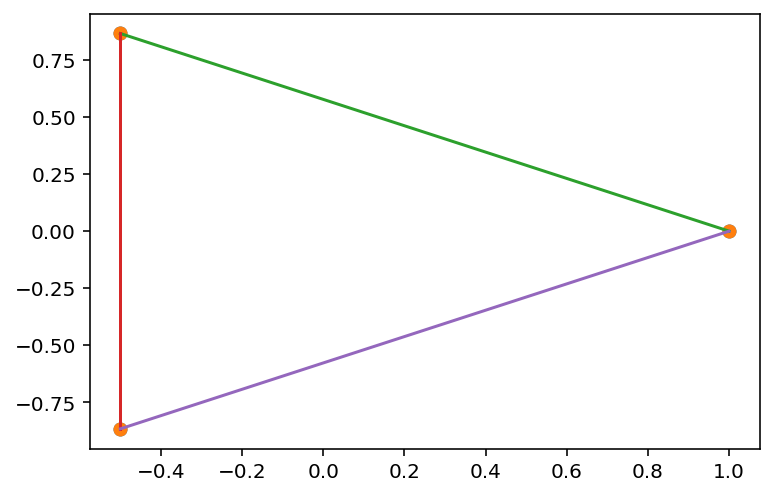

El tiempo tardado ha sido  0.182 segundos.
El orden por vecinos cercanos es  [0, 1, 2, 3, 0]
5.65685424949238


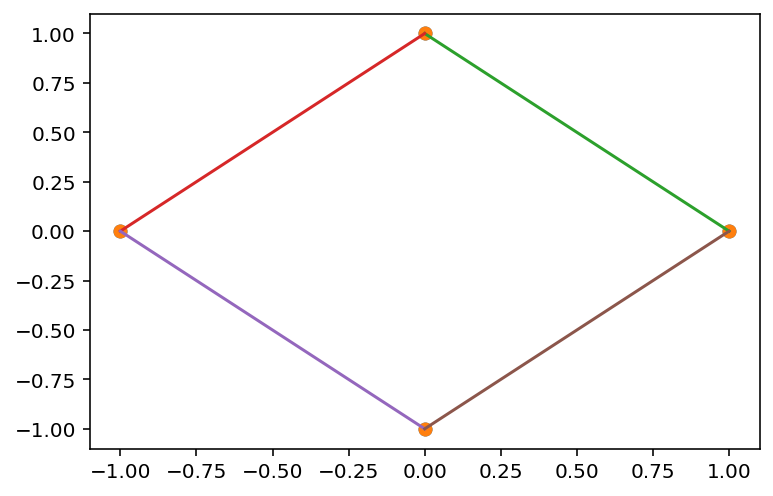

El tiempo tardado ha sido  0.188 segundos.
El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 0]
5.877852522924732


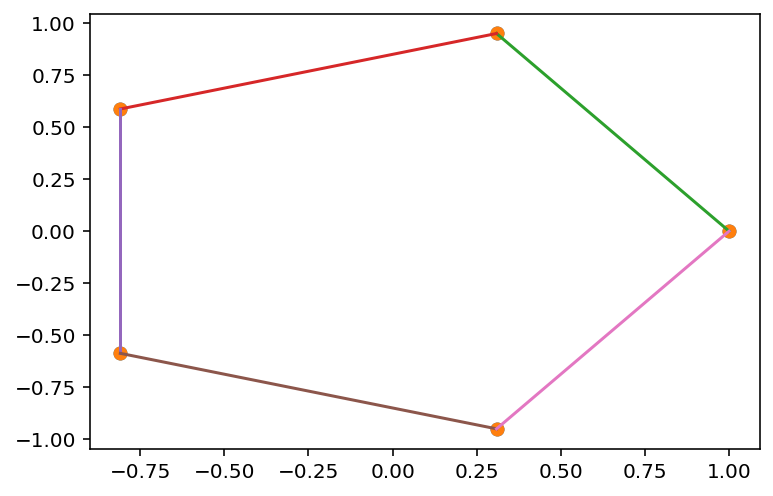

El tiempo tardado ha sido  0.179 segundos.
El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 5, 0]
6.0


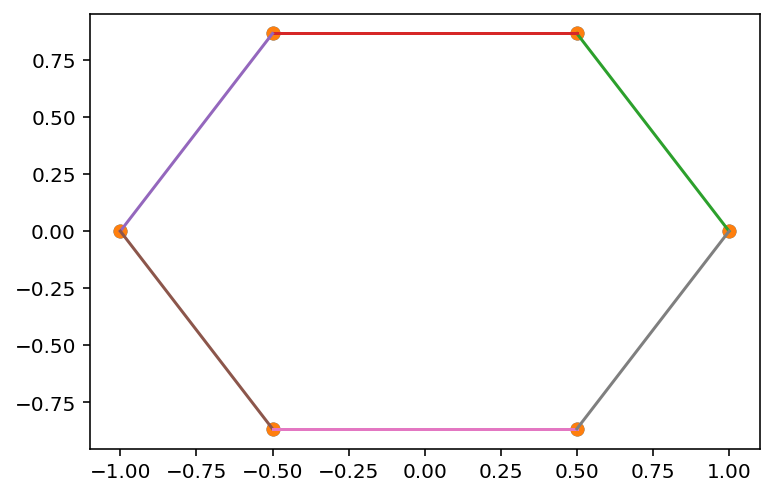

El tiempo tardado ha sido  0.171 segundos.
El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 5, 6, 0]
6.074372347645813


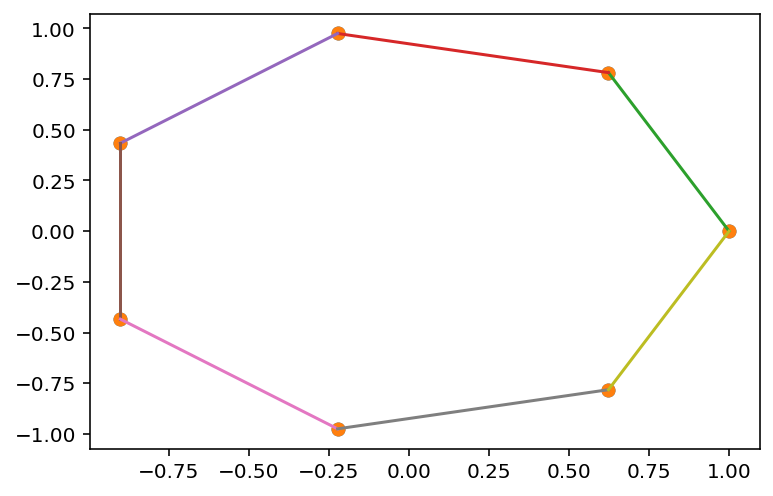

El tiempo tardado ha sido  0.177 segundos.
El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 5, 6, 7, 0]
6.122934917841436


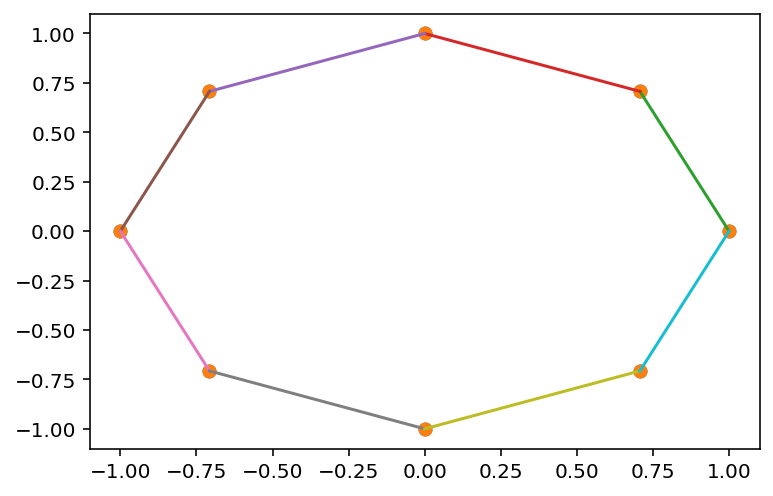

El tiempo tardado ha sido  0.176 segundos.
El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 5, 6, 7, 8, 0]
6.156362579862038


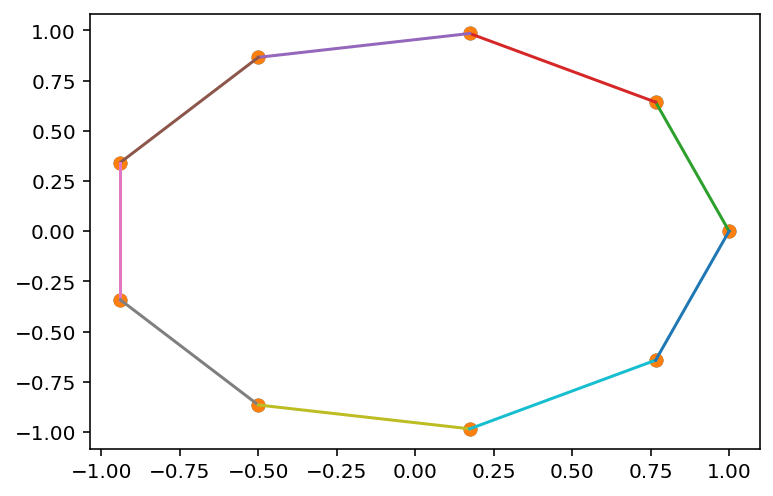

El tiempo tardado ha sido  0.186 segundos.
El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0]
6.180339887498948


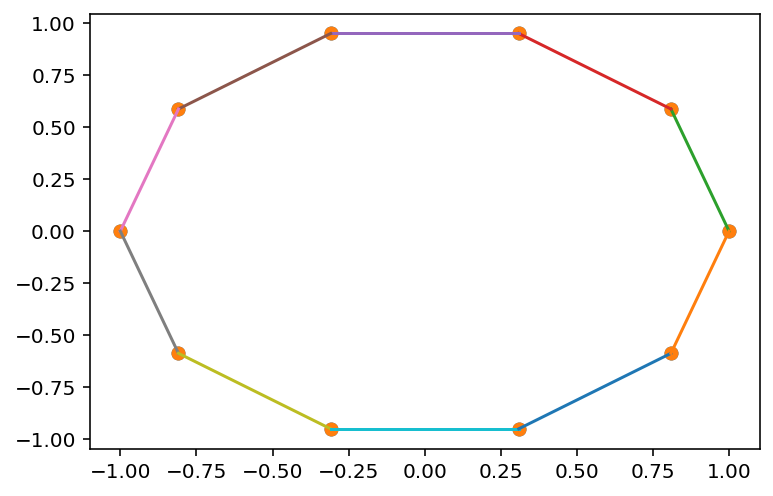

El tiempo tardado ha sido  0.272 segundos.
El orden por vecinos cercanos es  [0, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
6.198116250511453


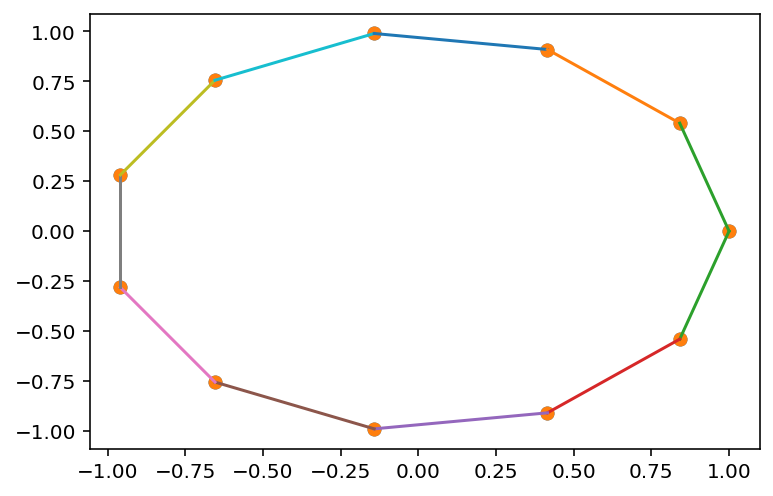

El tiempo tardado ha sido  0.2 segundos.
El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0]
6.211657082460498


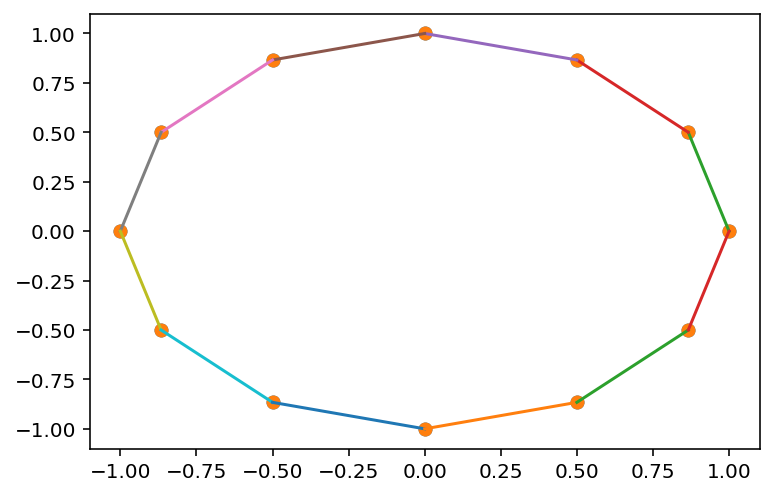

El tiempo tardado ha sido  0.185 segundos.
El orden por vecinos cercanos es  [0, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
6.222207271476503


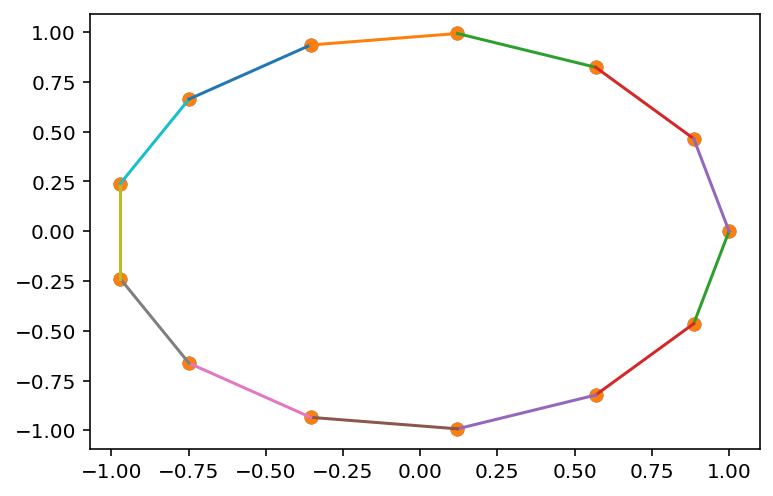

El tiempo tardado ha sido  0.2 segundos.
El orden por vecinos cercanos es  [0, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
6.230586150776802


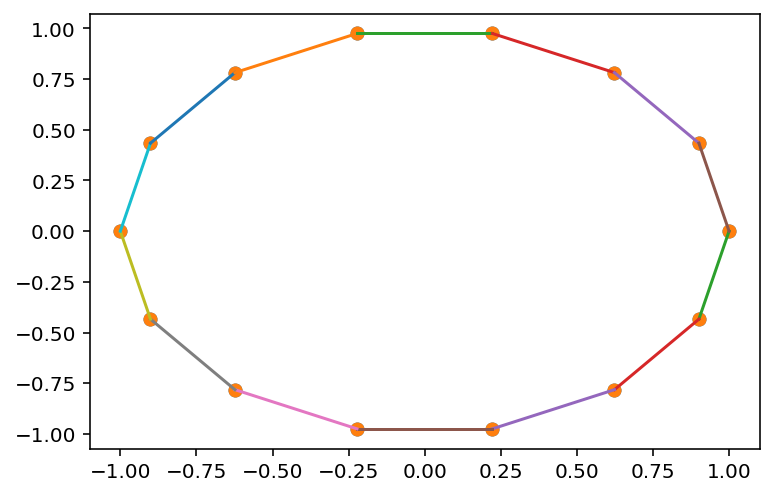

El tiempo tardado ha sido  0.212 segundos.
El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0]
6.23735072453278


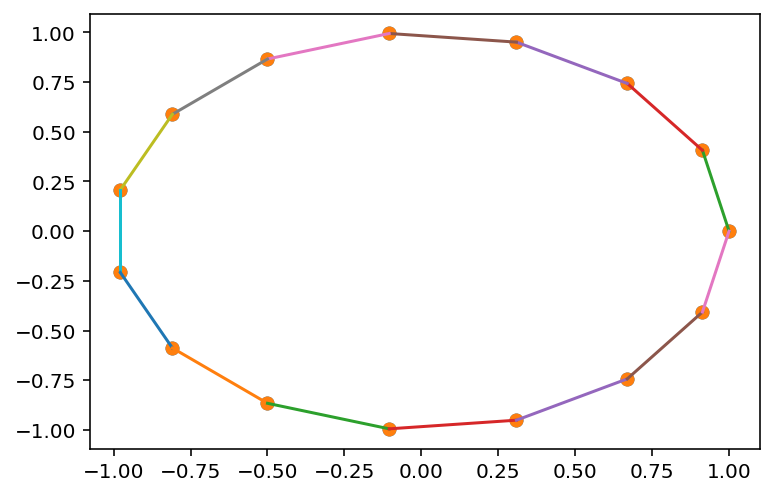

El tiempo tardado ha sido  0.176 segundos.


In [21]:
## Simulacion Modelizacón general
aristas = []
for N in range(2,15):
    M=N+1
    puntos = np.random.rand(M,2)
    for i in range(M):
        ang = 2*i*np.pi/M
        puntos[i,0],puntos[i,1] = np.cos(ang),np.sin(ang)
    #print(puntos)
    plt.plot(puntos[:,0],puntos[:,1],'o')

    def fnorm(v):  ## v must be a np.array
        return np.sqrt(np.sum(v**2))
    dist = np.zeros((N+2,N+2))
    for i in range(N):
        for j in range(i+1,N+1):
            aux  =  fnorm(puntos[i,:]-puntos[j,:])
            dist[i,j],dist[j,i] = aux,aux

    for j in range(0,N+1):
        i = N+1
        aux  =  fnorm(puntos[0,:]-puntos[j,:])
        dist[i,j],dist[j,i] = aux,aux
    #print(dist)


    start_time = time()
    lis_n = range(N+2)
    dist_aux  = np.copy(dist)
    for i in lis_n:
        dist_aux[i,i] = np.inf
    dist_aux = np.copy(dist_aux[:-1,:-1])

    i = 0
    dist_vc = 0
    ord_vc = [i]
    for jj in range(N+1):
        dist_aux[jj,0] = np.inf

    for cont in range(N):
        sig_dist = np.min(dist_aux[i,:])
        dist_vc += sig_dist
        sig = np.where(dist_aux[i,:] == sig_dist)[0][0]
        for jj in range(N+1):
            dist_aux[jj,sig] = np.inf
        i = sig
        ord_vc.append(i)

    dist_vc += dist[ord_vc[-1],0]
    ord_vc.append(0)
    ## print(dist_aux)

    print("El orden por vecinos cercanos es ", ord_vc)
    print(dist_vc)

    ## Pintamos el camino propuesto
    plt.plot(puntos[:,0],puntos[:,1],'o')
    for i in range(len(ord_vc)-1):
            plt.plot(puntos[(ord_vc[i],ord_vc[i+1]),0],puntos[(ord_vc[i],ord_vc[i+1]),1])
    plt.show()
    elapsed_time = np.round(time()-start_time,3)
    print("El tiempo tardado ha sido ",elapsed_time,"segundos.")
    ######
    from neal import SimulatedAnnealingSampler
    modelo = 0 ## Poner 0 para SA, 1 para simulated QA, 2 para real QA
    n_samples = 2

    stm1 = time() ## start time model 1
    pen = 2
    pen1 = 4

    Q = qubovert.QUBO()
    for u in range(N+2):
        for v in range(N+2):
            if u !=v:
                for t in range(N+1):
                    Q.create_var(f"x_{u}_{v}_{t}")

    for v in range(N+2):
        for t in range(N):
            Q.create_var(f"a_{v}_{t}")


    nqm1 = (N+2)*(N+2)*(N+1) ## Nnumber of qubits model 1

    ## Restriccion 1: Salimos una vez de cada ciudad
    for u in range(N+1):
        lambda_1 = pen1*np.max(dist[u,])
        for v1 in range(1,N+2):
            if u!=v1:
                for t1 in range(N+1):
                    for v2 in range(1,N+2):
                        if u!=v2:
                            for t2 in range(N+1):
                                Q[(f"x_{u}_{v1}_{t1}",f"x_{u}_{v2}_{t2}")] += lambda_1
                    Q[(f"x_{u}_{v1}_{t1}",)] += -2*lambda_1
    ## Minimo $-lambda_1*(N+1)$

    ## Restriccion 2: LLegamos una  vez a cada ciudad
    for v in range(1,N+2):
        lambda_2 = np.max(dist[:,v])*pen1
        for u1 in range(N+1):
            if v!=u1:
                for t1 in range(N+1):
                    for u2 in range(N+1):
                        if v!=u2:
                            for t2 in range(N+1):
                                Q[(f"x_{u1}_{v}_{t1}",f"x_{u2}_{v}_{t2}")] += lambda_2
                    Q[(f"x_{u1}_{v}_{t1}",)] += -2*lambda_2
    ## Minimo -lambda_2*(N+1)

    ## Restriccion 3: En cada instante solo podemos estar en un arista
    lambda_3 = dist_vc*pen
    for t in range(N+1):
        for u1 in range(N+2):
            for v1 in range(N+2):
                if u1 !=v1:
                    for u2 in range(N+2):
                        for v2 in range(N+2):
                            if u2!=v2:
                                Q[(f"x_{u1}_{v1}_{t}",f"x_{u2}_{v2}_{t}")] += lambda_3
                    Q[(f"x_{u1}_{v1}_{t}",)] += -2*lambda_3
    ## Minimo -lambda_3*(N+1)

    ## Restriccion 4: Evitamos que haya ciclos
    lambda_4 = dist_vc*pen

    ## variables a_{v,t} = \sum x_{v,w,t+1}
    for v in range(N+2):
        for t in range(N):
            Q[(f"a_{v}_{t}",)] += lambda_4
            for w in range(1,N+2):
                if v!=w:
                    Q[(f"a_{v}_{t}",f"x_{v}_{w}_{t+1}")] += -2*lambda_4
            for w1 in range(1,N+2):
                if w1 !=v:
                    for w2 in range(1,N+2):
                        if v != w2:
                            Q[(f"x_{v}_{w1}_{t+1}",f"x_{v}_{w2}_{t+1}")] += lambda_4

    for t in range(N):
        for u in range(N+2):
            for v in range(N+2):
                if u!=v:
                    Q[(f"x_{u}_{v}_{t}",f"a_{v}_{t}")] += -lambda_4
                    Q[(f"x_{u}_{v}_{t}",)] += +lambda_4



    # función objetivo
    lambda_obj = 1
    for u in range(N+2):
        for v in range(N+2):
            if u != v:
                for t in range(N+1):
                    Q[(f"x_{u}_{v}_{t}",)] += lambda_obj*dist[u,v]


    dwave_dic = {}
    for i in Q:
        if len(i) == 1:
            dwave_dic[(i[0],i[0])] = Q[i]
        else:
            dwave_dic[i] = Q[i]

    aristas.append(len(dwave_dic))

In [22]:
aristas_native = aristas

El orden por vecinos cercanos es  [0, 1, 2, 0]
5.196152422706632


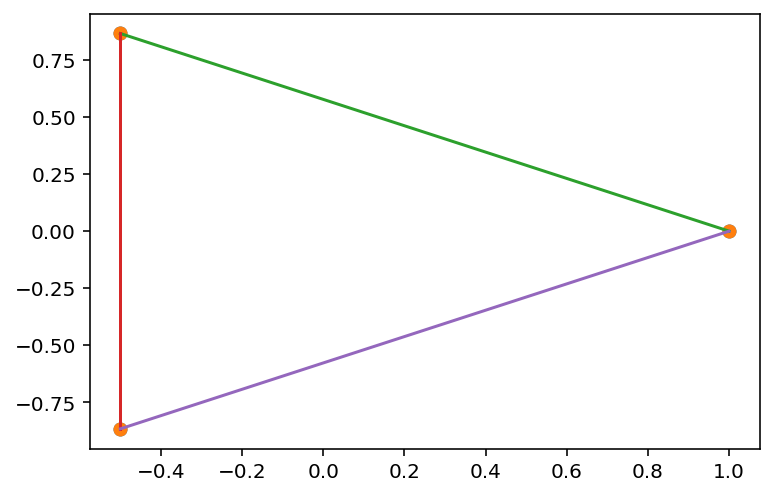

El tiempo tardado ha sido  0.159 segundos.
El orden por vecinos cercanos es  [0, 1, 2, 3, 0]
5.65685424949238


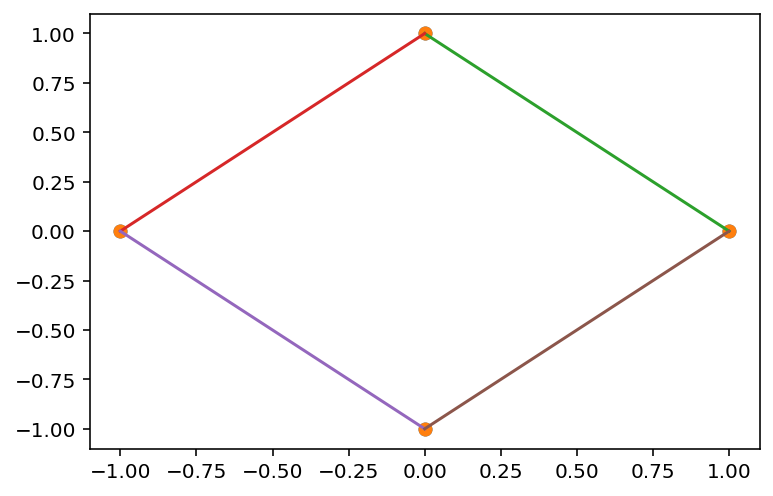

El tiempo tardado ha sido  0.182 segundos.
El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 0]
5.877852522924732


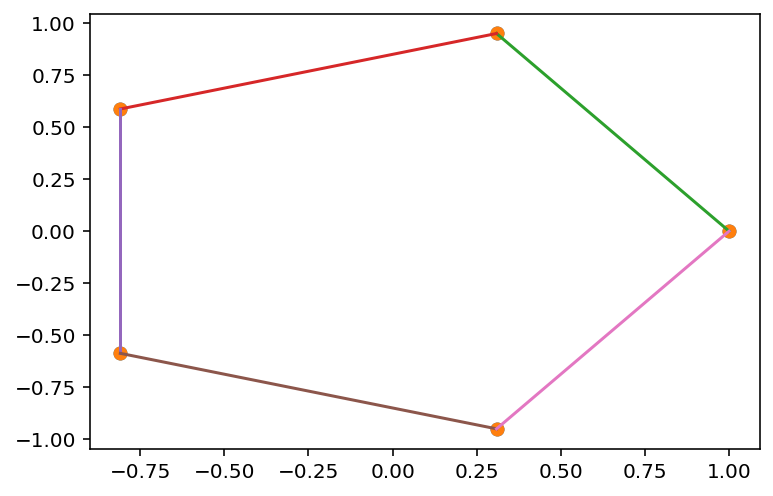

El tiempo tardado ha sido  0.179 segundos.
El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 5, 0]
6.0


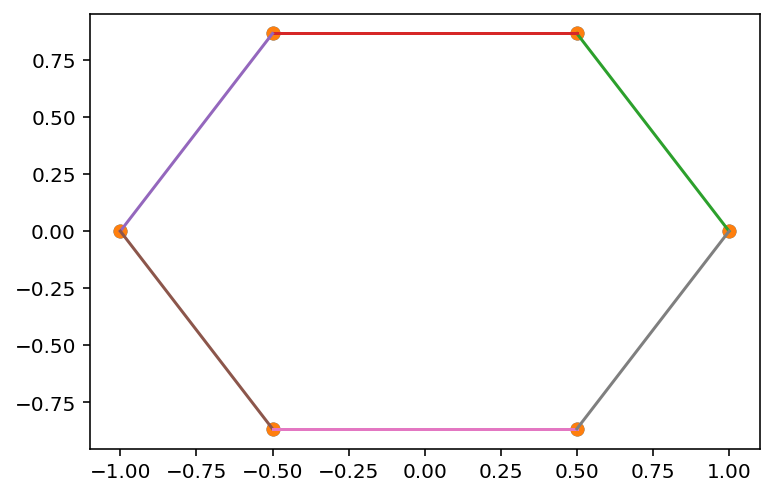

El tiempo tardado ha sido  0.174 segundos.
El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 5, 6, 0]
6.074372347645813


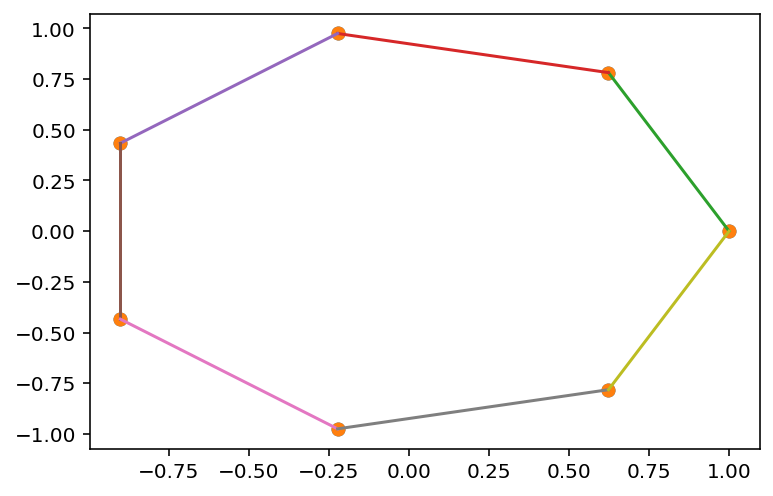

El tiempo tardado ha sido  0.168 segundos.
El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 5, 6, 7, 0]
6.122934917841436


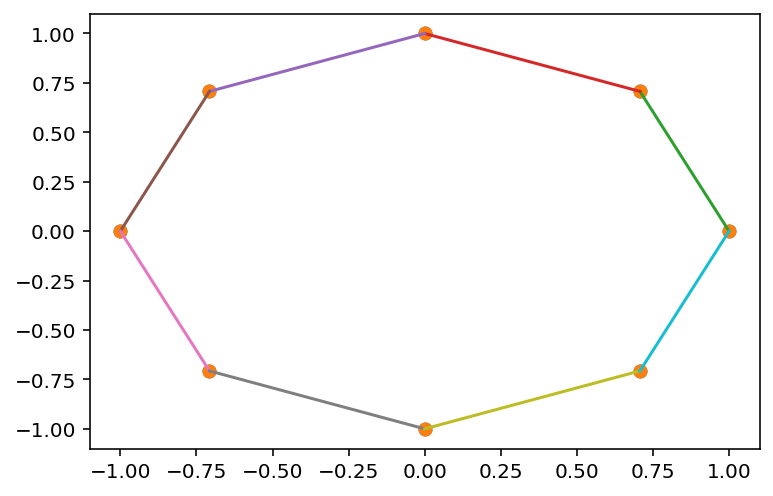

El tiempo tardado ha sido  0.174 segundos.
El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 5, 6, 7, 8, 0]
6.156362579862038


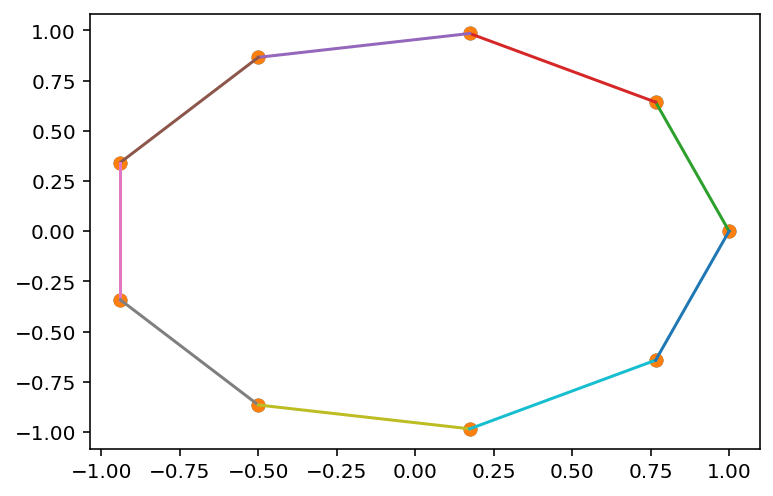

El tiempo tardado ha sido  0.17 segundos.
El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0]
6.180339887498948


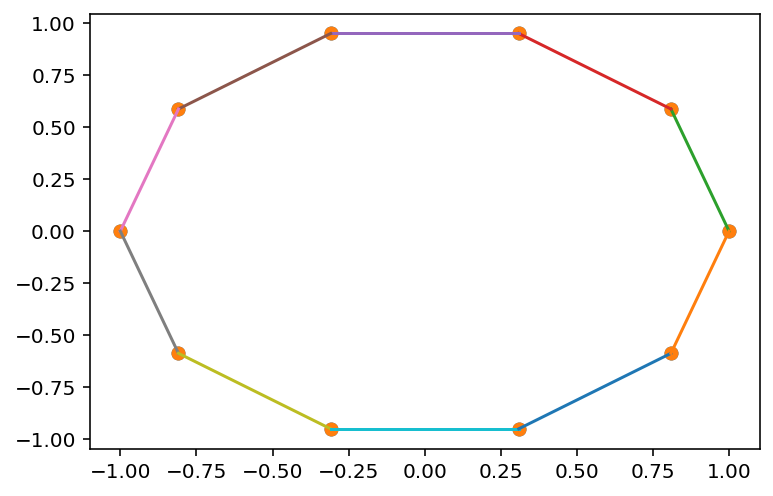

El tiempo tardado ha sido  0.177 segundos.


In [23]:
## Simulacion Modelizacón general
aristas = []
for N in range(2,10):
    M=N+1
    puntos = np.random.rand(M,2)
    for i in range(M):
        ang = 2*i*np.pi/M
        puntos[i,0],puntos[i,1] = np.cos(ang),np.sin(ang)
    #print(puntos)
    plt.plot(puntos[:,0],puntos[:,1],'o')

    def fnorm(v):  ## v must be a np.array
        return np.sqrt(np.sum(v**2))
    dist = np.zeros((N+2,N+2))
    for i in range(N):
        for j in range(i+1,N+1):
            aux  =  fnorm(puntos[i,:]-puntos[j,:])
            dist[i,j],dist[j,i] = aux,aux

    for j in range(0,N+1):
        i = N+1
        aux  =  fnorm(puntos[0,:]-puntos[j,:])
        dist[i,j],dist[j,i] = aux,aux
    #print(dist)


    start_time = time()
    lis_n = range(N+2)
    dist_aux  = np.copy(dist)
    for i in lis_n:
        dist_aux[i,i] = np.inf
    dist_aux = np.copy(dist_aux[:-1,:-1])

    i = 0
    dist_vc = 0
    ord_vc = [i]
    for jj in range(N+1):
        dist_aux[jj,0] = np.inf

    for cont in range(N):
        sig_dist = np.min(dist_aux[i,:])
        dist_vc += sig_dist
        sig = np.where(dist_aux[i,:] == sig_dist)[0][0]
        for jj in range(N+1):
            dist_aux[jj,sig] = np.inf
        i = sig
        ord_vc.append(i)

    dist_vc += dist[ord_vc[-1],0]
    ord_vc.append(0)
    ## print(dist_aux)

    print("El orden por vecinos cercanos es ", ord_vc)
    print(dist_vc)

    ## Pintamos el camino propuesto
    plt.plot(puntos[:,0],puntos[:,1],'o')
    for i in range(len(ord_vc)-1):
            plt.plot(puntos[(ord_vc[i],ord_vc[i+1]),0],puntos[(ord_vc[i],ord_vc[i+1]),1])
    plt.show()
    elapsed_time = np.round(time()-start_time,3)
    print("El tiempo tardado ha sido ",elapsed_time,"segundos.")
    ######
    from neal import SimulatedAnnealingSampler
    modelo = 0 ## Poner 0 para SA, 1 para simulated QA, 2 para real QA
    n_samples = 2

    stm1 = time() ## start time model 1
    pen = 2
    pen1 = 4

    Q = qubovert.QUBO()
    for u in range(N+2):
        for v in range(N+2):
            if u !=v:
                for t in range(N+1):
                    Q.create_var(f"x_{u}_{v}_{t}")

    for v in range(N+2):
        for t in range(N):
            Q.create_var(f"a_{v}_{t}")


    nqm1 = (N+2)*(N+2)*(N+1) ## Nnumber of qubits model 1

    ## Restriccion 1: Salimos una vez de cada ciudad
    for u in range(N+1):
        lambda_1 = pen1*np.max(dist[u,])
        for v1 in range(1,N+2):
            if u!=v1:
                for t1 in range(N+1):
                    for v2 in range(1,N+2):
                        if u!=v2:
                            for t2 in range(N+1):
                                Q[(f"x_{u}_{v1}_{t1}",f"x_{u}_{v2}_{t2}")] += lambda_1
                    Q[(f"x_{u}_{v1}_{t1}",)] += -2*lambda_1
    ## Minimo $-lambda_1*(N+1)$

    ## Restriccion 2: LLegamos una  vez a cada ciudad
    for v in range(1,N+2):
        lambda_2 = np.max(dist[:,v])*pen1
        for u1 in range(N+1):
            if v!=u1:
                for t1 in range(N+1):
                    for u2 in range(N+1):
                        if v!=u2:
                            for t2 in range(N+1):
                                Q[(f"x_{u1}_{v}_{t1}",f"x_{u2}_{v}_{t2}")] += lambda_2
                    Q[(f"x_{u1}_{v}_{t1}",)] += -2*lambda_2
    ## Minimo -lambda_2*(N+1)

    ## Restriccion 3: En cada instante solo podemos estar en un arista
    lambda_3 = dist_vc*pen
    for t in range(N+1):
        for u1 in range(N+2):
            for v1 in range(N+2):
                if u1 !=v1:
                    for u2 in range(N+2):
                        for v2 in range(N+2):
                            if u2!=v2:
                                Q[(f"x_{u1}_{v1}_{t}",f"x_{u2}_{v2}_{t}")] += lambda_3
                    Q[(f"x_{u1}_{v1}_{t}",)] += -2*lambda_3
    ## Minimo -lambda_3*(N+1)

    ## Restriccion 4: Evitamos que haya ciclos
    lambda_4 = dist_vc*pen

    ## variables a_{v,t} = \sum x_{v,w,t+1}
    for v in range(N+2):
        for t in range(N):
            Q[(f"a_{v}_{t}",)] += lambda_4
            for w in range(1,N+2):
                if v!=w:
                    Q[(f"a_{v}_{t}",f"x_{v}_{w}_{t+1}")] += -2*lambda_4
            for w1 in range(1,N+2):
                if w1 !=v:
                    for w2 in range(1,N+2):
                        if v != w2:
                            Q[(f"x_{v}_{w1}_{t+1}",f"x_{v}_{w2}_{t+1}")] += lambda_4

    for t in range(N):
        for u in range(N+2):
            for v in range(N+2):
                if u!=v:
                    Q[(f"x_{u}_{v}_{t}",f"a_{v}_{t}")] += -lambda_4
                    Q[(f"x_{u}_{v}_{t}",)] += +lambda_4



    # función objetivo
    lambda_obj = 1
    for u in range(N+2):
        for v in range(N+2):
            if u != v:
                for t in range(N+1):
                    Q[(f"x_{u}_{v}_{t}",)] += lambda_obj*dist[u,v]


    dwave_dic = {}
    for i in Q:
        if len(i) == 1:
            dwave_dic[(i[0],i[0])] = Q[i]
        else:
            dwave_dic[i] = Q[i]

    aristas.append(len(dwave_dic))

El orden por vecinos cercanos es  [0, 1, 2, 0]
5.196152422706632


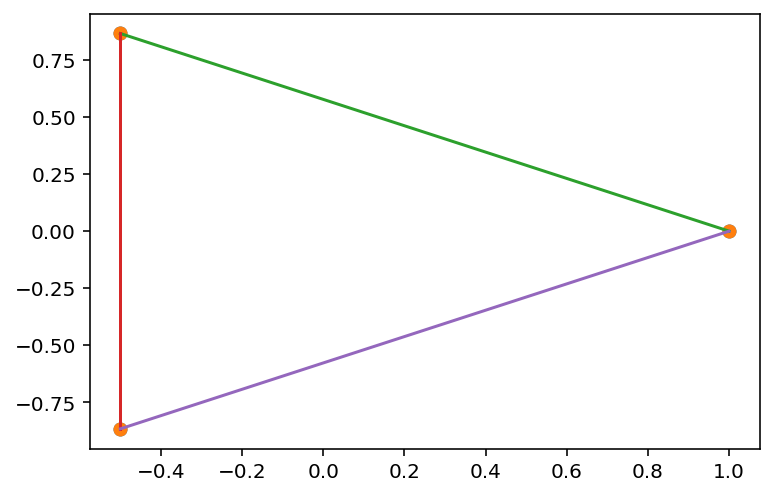

El tiempo tardado ha sido  0.151 segundos.
El orden por vecinos cercanos es  [0, 1, 2, 3, 0]
5.65685424949238


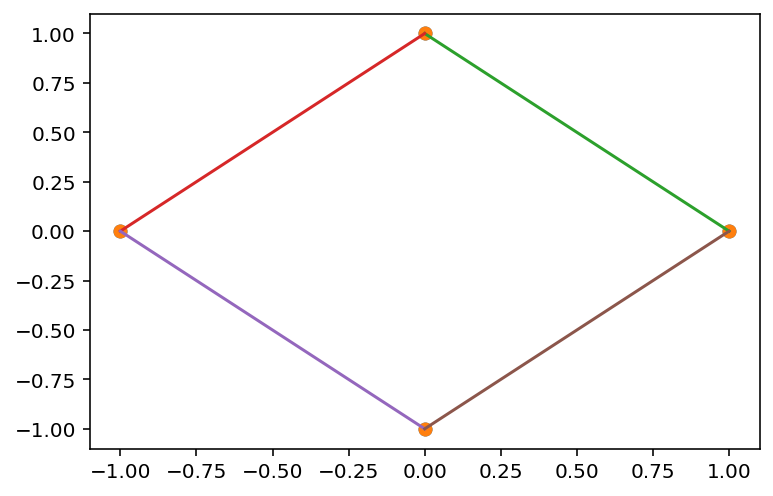

El tiempo tardado ha sido  0.187 segundos.
El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 0]
5.877852522924732


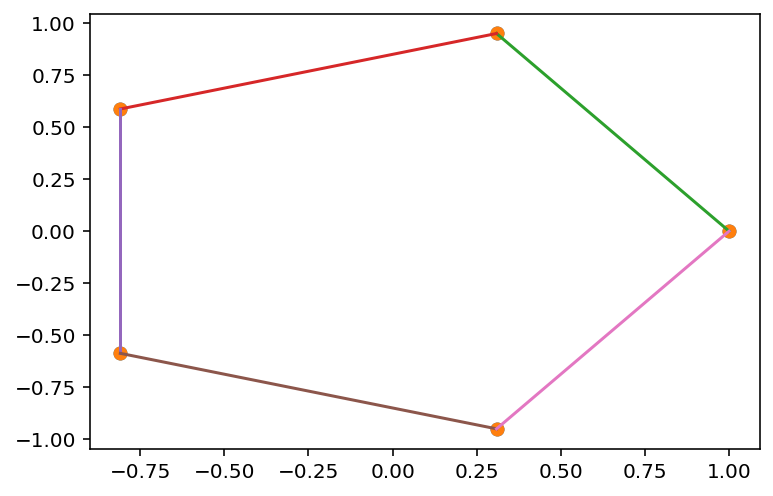

El tiempo tardado ha sido  0.174 segundos.
El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 5, 0]
6.0


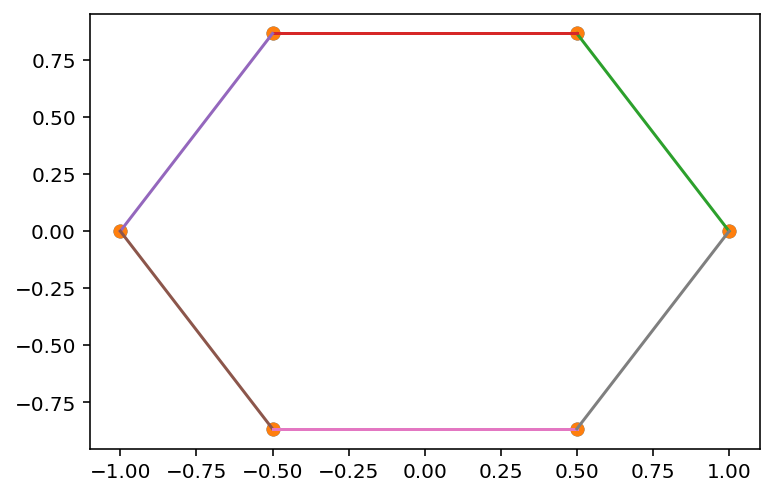

El tiempo tardado ha sido  0.165 segundos.
El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 5, 6, 0]
6.074372347645813


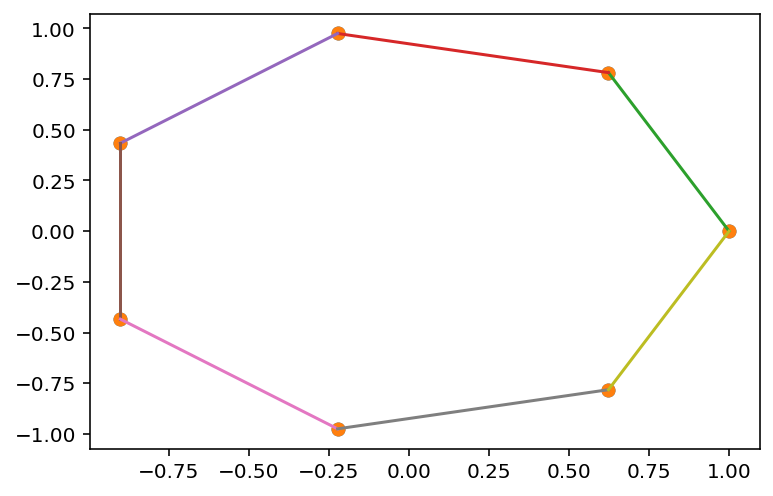

El tiempo tardado ha sido  0.18 segundos.
El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 5, 6, 7, 0]
6.122934917841436


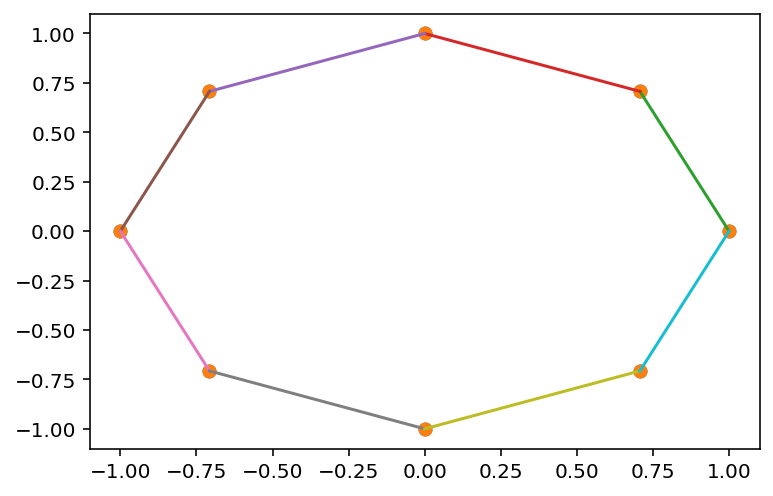

El tiempo tardado ha sido  0.186 segundos.
El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 5, 6, 7, 8, 0]
6.156362579862038


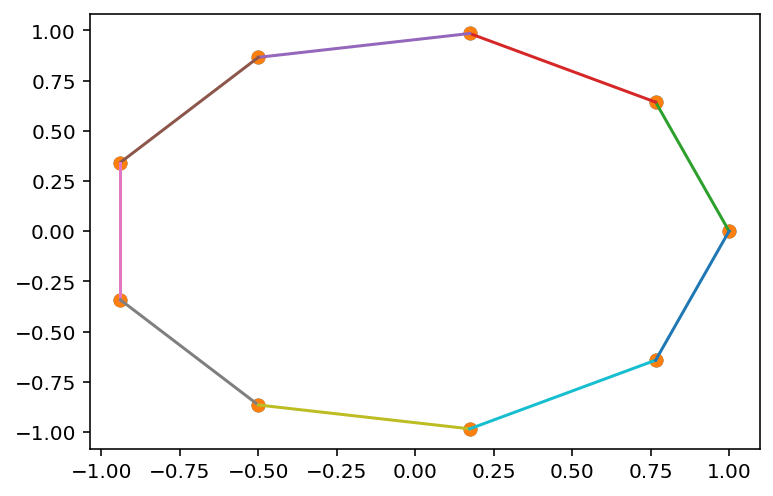

El tiempo tardado ha sido  0.185 segundos.
El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0]
6.180339887498948


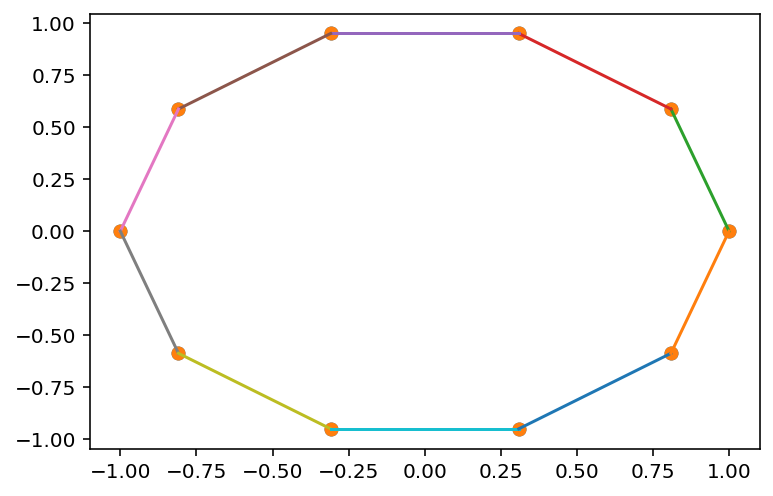

El tiempo tardado ha sido  0.18 segundos.
El orden por vecinos cercanos es  [0, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
6.198116250511453


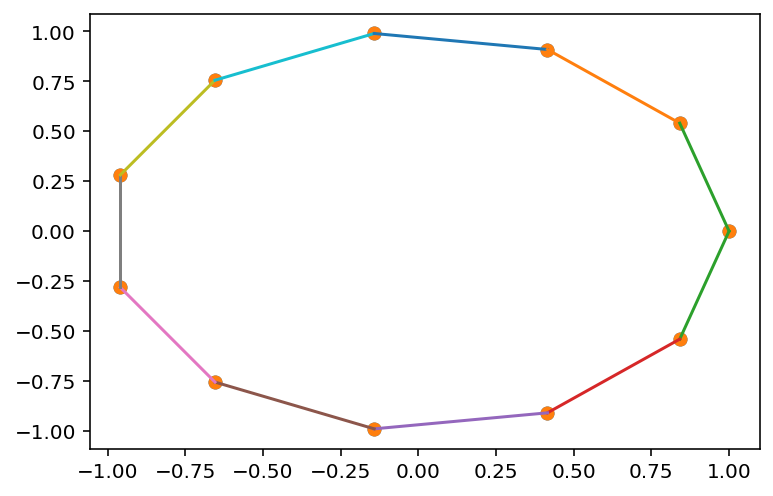

El tiempo tardado ha sido  0.179 segundos.
El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0]
6.211657082460498


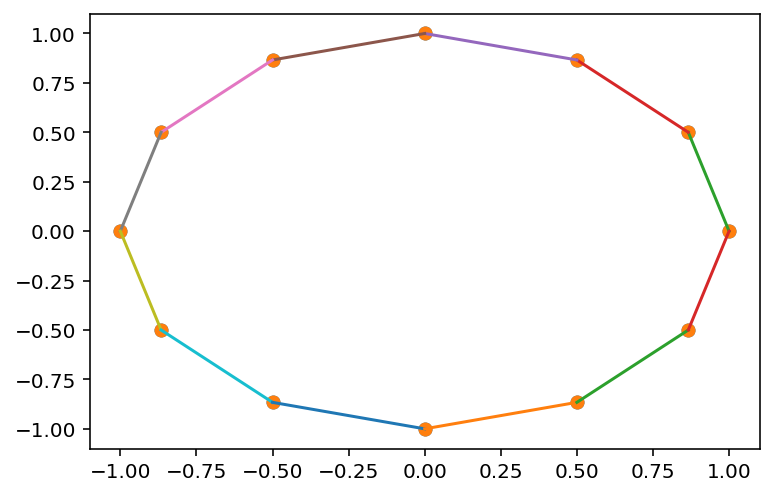

El tiempo tardado ha sido  0.176 segundos.
El orden por vecinos cercanos es  [0, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
6.222207271476503


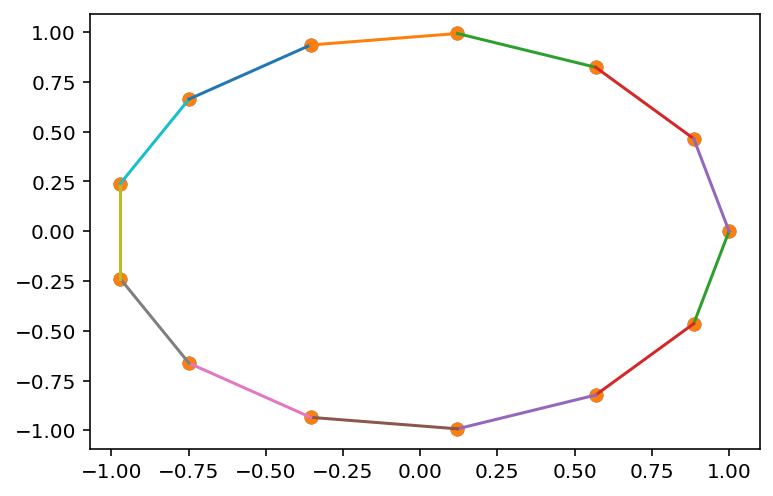

El tiempo tardado ha sido  0.181 segundos.
El orden por vecinos cercanos es  [0, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
6.230586150776802


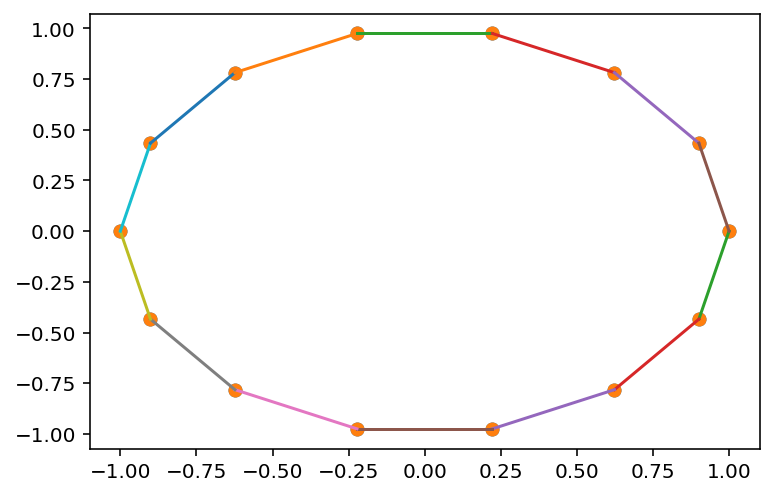

El tiempo tardado ha sido  0.187 segundos.
El orden por vecinos cercanos es  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0]
6.23735072453278


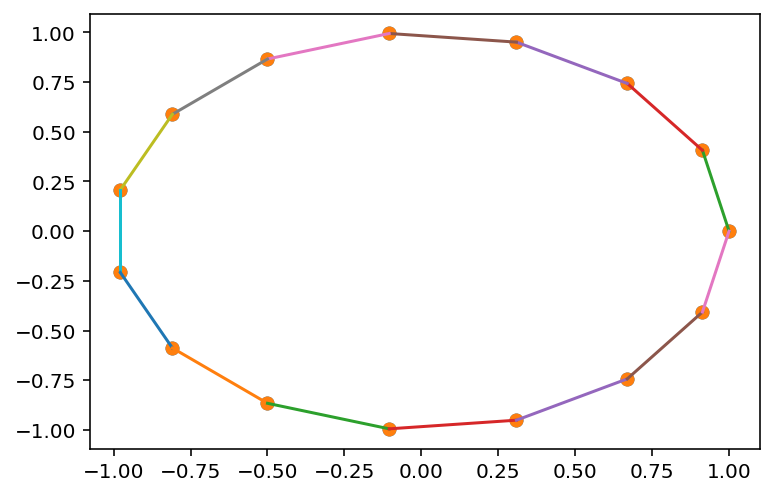

El tiempo tardado ha sido  0.182 segundos.


In [24]:
aristas = []
for N in range(2,15):
    M=N+1
    puntos = np.random.rand(M,2)
    for i in range(M):
        ang = 2*i*np.pi/M
        puntos[i,0],puntos[i,1] = np.cos(ang),np.sin(ang)
    #print(puntos)
    plt.plot(puntos[:,0],puntos[:,1],'o')

    def fnorm(v):  ## v must be a np.array
        return np.sqrt(np.sum(v**2))
    dist = np.zeros((N+2,N+2))
    for i in range(N):
        for j in range(i+1,N+1):
            aux  =  fnorm(puntos[i,:]-puntos[j,:])
            dist[i,j],dist[j,i] = aux,aux

    for j in range(0,N+1):
        i = N+1
        aux  =  fnorm(puntos[0,:]-puntos[j,:])
        dist[i,j],dist[j,i] = aux,aux
    #print(dist)


    start_time = time()
    lis_n = range(N+2)
    dist_aux  = np.copy(dist)
    for i in lis_n:
        dist_aux[i,i] = np.inf
    dist_aux = np.copy(dist_aux[:-1,:-1])

    i = 0
    dist_vc = 0
    ord_vc = [i]
    for jj in range(N+1):
        dist_aux[jj,0] = np.inf

    for cont in range(N):
        sig_dist = np.min(dist_aux[i,:])
        dist_vc += sig_dist
        sig = np.where(dist_aux[i,:] == sig_dist)[0][0]
        for jj in range(N+1):
            dist_aux[jj,sig] = np.inf
        i = sig
        ord_vc.append(i)

    dist_vc += dist[ord_vc[-1],0]
    ord_vc.append(0)
    ## print(dist_aux)

    print("El orden por vecinos cercanos es ", ord_vc)
    print(dist_vc)

    ## Pintamos el camino propuesto
    plt.plot(puntos[:,0],puntos[:,1],'o')
    for i in range(len(ord_vc)-1):
            plt.plot(puntos[(ord_vc[i],ord_vc[i+1]),0],puntos[(ord_vc[i],ord_vc[i+1]),1])
    plt.show()
    elapsed_time = np.round(time()-start_time,3)
    print("El tiempo tardado ha sido ",elapsed_time,"segundos.")
    ######
    from neal import SimulatedAnnealingSampler
    
    modelo = 0 ## Poner 0 para SA, 1 para simulated QA, 2 para real QA
    n_samples = 300 # número de veces que ejecutamos el sistema

    stm2 = time()

    R=3
    lis_r = range(R)
    lis_n = range(0,N+2)

    pen = 2
    pen1 = 4

    # Creamos las variables de nuestro modelo
    coef = qubovert.QUBO()

    ## Variables x_{i,j,r,q}
    for i in lis_n:
        for j in lis_n:
            if not i==j:
                for r in lis_r:
                    coef.create_var(f"x_{i}_{j}_{r}")
    nqm2 = len(lis_n)*len(lis_n)*len(lis_r)
    nqm2 = (N+2)*(N+2)*3

    ## Restricción 1
    ## Un solo caso para cada r
    lambda_1 = dist_vc*pen
    for i in lis_n:
        for j in lis_n:
            if not i==j:
                for r1 in lis_r:
                    for r2 in lis_r:
                        coef[(f"x_{i}_{j}_{r1}",f"x_{i}_{j}_{r2}")] += (lambda_1)
                for r in lis_r:     
                        coef[(f"x_{i}_{j}_{r}",)] += -2*(lambda_1)



    ## Restriccion 2
    ## Se debe salir una vez de cada nodo
    for i in range(N+1):
        lambda_2 = pen1*np.max(dist[i,])
        for j in lis_n:
            if not i == j:
                coef[(f"x_{i}_{j}_{1}",)] += -2*lambda_2 
        for j1 in  lis_n:
            if j1 != i:
                for j2 in lis_n:
                    if j2!=i:
                        coef[(f"x_{i}_{j1}_{1}",f"x_{i}_{j2}_{1}")]+= lambda_2 



    ## Restriccion 3
    ## Se debe llegar una vez a cada nodo
    for j in range(1,N+2):
        lambda_3 = np.max(dist[:,j])*pen1
        for i in range(N+1):
            if i!=j:
                coef[(f"x_{i}_{j}_{1}",)] += -2*lambda_3
        for i1 in  lis_n:
            if i1!=j:
                for i2 in lis_n:
                    if i2!=j:
                        coef[(f"x_{i1}_{j}_{1}",f"x_{i2}_{j}_{1}")]+= lambda_3 


    ## Restriccion 7
    ## Correcto orden de los nodos i,j
    lambda_7 = dist_vc*pen
    for i in lis_n:
        for j in lis_n:
            if i!=j:
                coef[(f"x_{i}_{j}_{2}",f"x_{j}_{i}_{2}")] += lambda_7 
                coef[(f"x_{i}_{j}_{2}",)] += -lambda_7 
                coef[(f"x_{j}_{i}_{2}",)] += -lambda_7 





    ## Restriccion 8
    ## Relacion de orden entre los nodos i,j,k
    lambda_8 = dist_vc*pen
    for i in range(1,N+1):
        for j in range(1,N+1):
            for k in range(1,N+1):
                if i!=j and j!=k and i!=k:
                            coef[(f"x_{j}_{i}_{2}",f"x_{k}_{j}_{2}")] += lambda_8
                            coef[(f"x_{j}_{i}_{2}",f"x_{k}_{i}_{2}")] -= lambda_8
                            coef[(f"x_{k}_{j}_{2}",f"x_{k}_{i}_{2}")] -= lambda_8
                            coef[(f"x_{k}_{i}_{2}",)] +=  lambda_8


    ## Funcion objetivo
    lambda_obj = 1
    for i in lis_n:
        for j in lis_n:
            if i!=j:
                coef[(f"x_{i}_{j}_{1}",)] += lambda_obj*dist[i,j]



    dwave_dic = {}
    for i in coef:
        if len(i) == 1:
            dwave_dic[(i[0],i[0])] = coef[i]
        else:
            dwave_dic[i] = coef[i]
        
    aristas.append(len(dwave_dic))
    


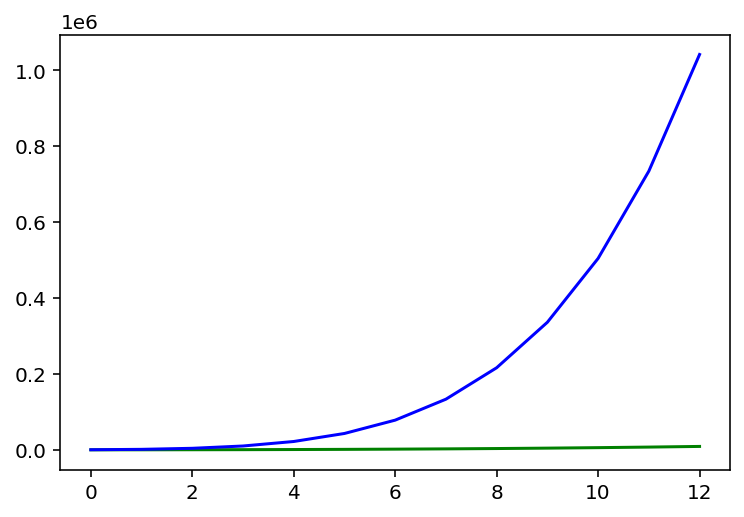

In [25]:
plt.plot(aristas,color='green')
plt.plot(aristas_native,color='blue')

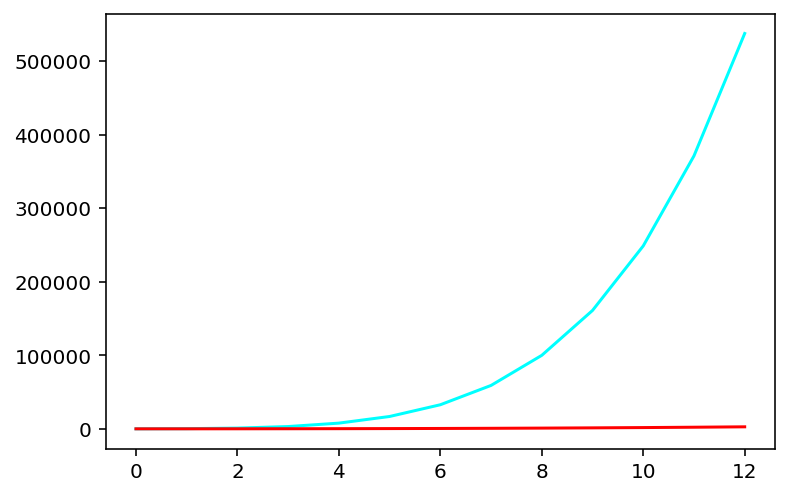

In [26]:
xx_1 = []
xx_2 = []
for i in range(2,15):
    xx_1.append(i**5)
    xx_2.append(i**3)

plt.plot(xx_1,color='cyan')
plt.plot(xx_2,color='red')

In [27]:
N**6
#(N^3)^2

7529536

In [28]:
N

14